In [94]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Load data from Basketball Reference

In [2]:
# load all stat tables (each with all current players)

# per game
page_pg = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_game.html')
soup_pg = BeautifulSoup(page_pg.text, 'html.parser')

# advanced
page_adv = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_advanced.html')
soup_adv = BeautifulSoup(page_adv.text, 'html.parser')

# advanced shooting
page_sho = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_shooting.html')
soup_sho = BeautifulSoup(page_sho.text, 'html.parser')

# adjusted shooting
page_adjSho = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_adj_shooting.html')
soup_adjSho = BeautifulSoup(page_adjSho.text, 'html.parser')

# stats per 36 min
page_36 = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_minute.html')
soup_36 = BeautifulSoup(page_36.text, 'html.parser')

# stats per 100 poss
page_100 = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_per_poss.html')
soup_100 = BeautifulSoup(page_100.text, 'html.parser')

# totals
page_tot = requests.get('https://www.basketball-reference.com/leagues/NBA_2022_totals.html')
soup_tot = BeautifulSoup(page_tot.text, 'html.parser')

## per game

In [228]:

masterList = []
for i in soup_pg:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 29:
                    masterList.append(row)
                    break

per_game_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MPG','FG','FGA','FG%','3P','3PA','3P%','2P','2PA','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS'])

## advanced

In [4]:

masterList = []
for i in soup_adv:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 28:
                    masterList.append(row)
                    break

advanced_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','-','OWS','DWS','WS','WS/48','-','OBPM','DBPM','BPM' ,'VORP'])
advanced_df = advanced_df[['Player','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM' ,'VORP']]         

## advanced shooting

In [5]:

masterList = []
for i in soup_sho:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 34:
                    masterList.append(row)
                    break

shooting_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','MP','FG%','Dist.','-','%FGA_by_dist_2P','%FGA_by_dist_0-3','%FGA_by_dist_3-10','%FGA_by_dist_10-16','%FGA_by_dist_16-3P','%FGA_by_dist_3P','-','FG%_by_dist_2P','FG%_by_dist_0-3','FG%_by_dist_3-10','FG%_by_dist_10-16','FG%_by_dist_16-3P','FG%_by_dist_3P','-','%_FG_assisted_2P','%_FG_assisted_3P','-','%FGA_dunks','made_dunks','-','corner_%3PA','corner_3P%','-','att_heaves','made_heaves'])
shooting_df = shooting_df[['Player','Dist.','%FGA_by_dist_2P','%FGA_by_dist_0-3','%FGA_by_dist_3-10','%FGA_by_dist_10-16','%FGA_by_dist_16-3P','%FGA_by_dist_3P','FG%_by_dist_2P','FG%_by_dist_0-3','FG%_by_dist_3-10','FG%_by_dist_10-16','FG%_by_dist_16-3P','FG%_by_dist_3P','%_FG_assisted_2P','%_FG_assisted_3P','%FGA_dunks','made_dunks','corner_%3PA','corner_3P%','att_heaves','made_heaves']]                                  

## adjusted shooting

In [6]:

masterList = []
for i in soup_adjSho:
    
    # split by player
    for j in str(i).split('\n'):
        if '<th scope="row" class="right' in j:
            row = []
            for k in j.split("</td>"):
                
                if 'th scope="row" class="right "' in k:
                    temp = k[k.index('.html">')+7:]
                    temp = temp[:temp.index('<')]
                    name = ""
                    firstName = True
                    nameList = str(temp).split(' ')
                    
                    name += nameList[1]
                    name += ','
                    name += nameList[0]
                    row.append(name)
                    
                else:
                    currStat = k[k.index(">")+1:]
                   
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 27:
                    masterList.append(row)
                    break
                    
adjShooting_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Team','G','MP','-','FG','2P','3P','eFG','FT','TS','FTr','3PAr','-','FG+ (L.A.)','2P+ (L.A.)','3P+ (L.A.)','eFG+ (L.A.)','FT+ (L.A.)','TS+ (L.A.)','FTr+ (L.A.)','3PAr+ (L.A.)','-','FG Add','TS Add'])
adjShooting_df = adjShooting_df[['Player','FG+ (L.A.)','2P+ (L.A.)','3P+ (L.A.)','eFG+ (L.A.)','FT+ (L.A.)','TS+ (L.A.)','FTr+ (L.A.)','3PAr+ (L.A.)','FG Add','TS Add']]


## per 36 min

In [7]:

masterList = []
for i in soup_36:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            
            row = []
            
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                
                # end when all stats are added to row
                if len(row) == 28:
                    masterList.append(row)
                    break

per_36_min_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP','FG_per_36','FGA_per_36','FG%_per_36','3P_per_36','3PA_per_36','3P%_per_36','2P_per_36','2PA_per_36','2P%_per_36','FT_per_36','FTA_per_36','FT%_per_36','ORB_per_36','DRB_per_36','TRB_per_36','AST_per_36','STL_per_36','BLK_per_36','TOV_per_36','PF_per_36','PTS_per_36'])
per_36_min_df = per_36_min_df[['Player','FG_per_36','FGA_per_36','FG%_per_36','3P_per_36','3PA_per_36','3P%_per_36','2P_per_36','2PA_per_36','2P%_per_36','FT_per_36','FTA_per_36','FT%_per_36','ORB_per_36','DRB_per_36','TRB_per_36','AST_per_36','STL_per_36','BLK_per_36','TOV_per_36','PF_per_36','PTS_per_36']]                                  

## per 100 poss

In [8]:

masterList = []
for i in soup_100:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 31:
                    masterList.append(row)
                    break

per_100_poss_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP','FG_per_100_poss','FGA_per_100_poss','FG%_per_100_poss','3P_per_100_poss','3PA_per_100_poss','3P%_per_100_poss','2P_per_100_poss','2PA_per_100_poss','2P%_per_100_poss','FT_per_100_poss','FTA_per_100_poss','FT%_per_100_poss','ORB_per_100_poss','DRB_per_100_poss','TRB_per_100_poss','AST_per_100_poss','STL_per_100_poss','BLK_per_100_poss','TOV_per_100_poss','PF_per_100_poss','PTS_per_100_poss', '-', 'ORtg', 'DRtg'])
per_100_poss_df = per_100_poss_df[['Player','FG_per_100_poss','FGA_per_100_poss','FG%_per_100_poss','3P_per_100_poss','3PA_per_100_poss','3P%_per_100_poss','2P_per_100_poss','2PA_per_100_poss','2P%_per_100_poss','FT_per_100_poss','FTA_per_100_poss','FT%_per_100_poss','ORB_per_100_poss','DRB_per_100_poss','TRB_per_100_poss','AST_per_100_poss','STL_per_100_poss','BLK_per_100_poss','TOV_per_100_poss','PF_per_100_poss','PTS_per_100_poss', 'ORtg', 'DRtg']]

## totals

In [9]:

masterList = []
for i in soup_tot:
    
    # split by player
    for j in str(i).split('\n'):
        if '<tr class="full_table">' in j:
            row = []
            # split by stat
            for k in j.split('</td>'):
                
                # get name
                if 'scope="row">' in k:
                    temp = k[k.index('class="left" csk=')+18:]
                    row.append(temp[:temp.index('"')])
                    
                else:
                    currStat = k[k.index(">")+1:]
                    
                    # get team
                    if "href" in currStat:
                        tempStat = currStat[currStat.index("teams/")+6:]
                        row.append(tempStat[:3])
                    
                    # get all other stats
                    else:

                        try:
                            row.append(float(currStat))
                        except:
                            if len(currStat) == 0:
                                currStat = 0.0
                            row.append(currStat)
                            
                
                # end when all stats are added to row
                if len(row) == 29:
                    masterList.append(row)
                    break

totals_df = pd.DataFrame(masterList, columns = ['Player','Pos','Age','Tm','G','GS','MP_total','FG_total','FGA_total','FG%_total','3P_total','3PA_total','3P%_total','2P_total','2PA_total','2P%_total','eFG%_total','FT_total','FTA_total','FT%_total','ORB_total','DRB_total','TRB_total','AST_total','STL_total','BLK_total','TOV_total','PF_total','PTS_total'])
totals_df = totals_df[['Player','MP_total','FG_total','FGA_total','3P_total','3PA_total','2P_total','2PA_total','FT_total','FTA_total','ORB_total','DRB_total','TRB_total','AST_total','STL_total','BLK_total','TOV_total','PF_total','PTS_total']]

## construct master DF

In [229]:
# join dfs
NBA_df = per_game_df.merge(advanced_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(totals_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(shooting_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(adjShooting_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(per_36_min_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.merge(per_100_poss_df, how='left', left_on='Player', right_on='Player')
NBA_df = NBA_df.astype({"Age": int, "G": int, "GS": int, 'FG_total': int,'FGA_total': int,'3P_total': int,'3PA_total': int,'2P_total': int,'2PA_total': int,'FT_total': int,'FTA_total': int,'ORB_total': int,'DRB_total': int,'TRB_total': int,'AST_total': int,'STL_total': int,'BLK_total': int,'TOV_total': int,'PF_total': int,'PTS_total': int})
len(NBA_df)

427

In [230]:
NBA_df['Pos'][NBA_df["Pos"] == "G"] = "PG"
NBA_df['Pos'][NBA_df["Pos"] == "F"] = "SF"
NBA_df['Pos'][NBA_df["Pos"] == "G-F"] = "PG"
PGs = NBA_df[NBA_df['Pos'] == "PG"]
SGs = NBA_df[NBA_df['Pos'] == "SG"]
SFs = NBA_df[NBA_df['Pos'] == "SF"]
PFs = NBA_df[NBA_df['Pos'] == "PF"]
Cs = NBA_df[NBA_df['Pos'] == "C"]

<ipython-input-230-4344638fa874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_df['Pos'][NBA_df["Pos"] == "G"] = "PG"
<ipython-input-230-4344638fa874>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_df['Pos'][NBA_df["Pos"] == "F"] = "SF"
<ipython-input-230-4344638fa874>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA_df['Pos'][NBA_df["Pos"] == "G-F"] = "PG"


In [231]:
NBA_df.name = "the whole NBA"
PGs.name = "Point Guards"
SGs.name = "Shooting Guards"
SFs.name = "Small Forwards"
PFs.name = "Power Forwards"
Cs.name = "Centers"
for i in NBA_df.columns:
    print(i)

Player
Pos
Age
Tm
G
GS
MPG
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS
PER
TS%
3PAr
FTr
ORB%
DRB%
TRB%
AST%
STL%
BLK%
TOV%
USG%
OWS
DWS
WS
WS/48
OBPM
DBPM
BPM
VORP
MP_total
FG_total
FGA_total
3P_total
3PA_total
2P_total
2PA_total
FT_total
FTA_total
ORB_total
DRB_total
TRB_total
AST_total
STL_total
BLK_total
TOV_total
PF_total
PTS_total
Dist.
%FGA_by_dist_2P
%FGA_by_dist_0-3
%FGA_by_dist_3-10
%FGA_by_dist_10-16
%FGA_by_dist_16-3P
%FGA_by_dist_3P
FG%_by_dist_2P
FG%_by_dist_0-3
FG%_by_dist_3-10
FG%_by_dist_10-16
FG%_by_dist_16-3P
FG%_by_dist_3P
%_FG_assisted_2P
%_FG_assisted_3P
%FGA_dunks
made_dunks
corner_%3PA
corner_3P%
att_heaves
made_heaves
FG+ (L.A.)
2P+ (L.A.)
3P+ (L.A.)
eFG+ (L.A.)
FT+ (L.A.)
TS+ (L.A.)
FTr+ (L.A.)
3PAr+ (L.A.)
FG Add
TS Add
FG_per_36
FGA_per_36
FG%_per_36
3P_per_36
3PA_per_36
3P%_per_36
2P_per_36
2PA_per_36
2P%_per_36
FT_per_36
FTA_per_36
FT%_per_36
ORB_per_36
DRB_per_36
TRB_per_36
AST_per_36
STL_per_36
BLK_per_36
TOV_per_36

# Visualizations

In [232]:
def labeled_scatter(X_axis, Y_axis, figsize_x = 40, figsize_y = 30, data=None,
                    filter_col = None, filter_val = None, greater_than = None):

    if filter_col == None:
        df = data
        if df == None:
            df = NBA_df
            df.name = NBA_df.name
        else:
            df.name = data.name
        
    else:
        try:
            if greater_than:
                df = data[data[filter_col] >= filter_val].reset_index()
                df.name = data.name
            else:
                df = data[data[filter_col] <= filter_val].reset_index()
                df.name = data.name
        except:
            if greater_than:
                df = NBA_df[NBA_df[filter_col] >= filter_val].reset_index()
                df.name = NBA_df.name
            else:
                df = NBA_df[NBA_df[filter_col] <= filter_val].reset_index()
                df.name = NBA_df.name
            

    annotations=list(df["Player"])
    plt.figure(figsize=(figsize_x, figsize_y))
    colors = {'PG':'red', 'SG':'yellow', 'SF':'green', 'PF':'blue', 'C':'pink'}
    plt.scatter(df[X_axis],df[Y_axis],s=200,c=list(df["Pos"].map(colors)), alpha=.6)
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=25) for k, v in colors.items()]
    plt.legend(title='Pos', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20, title_fontsize=25)
    plt.xlabel(X_axis, fontsize=30)
    plt.ylabel(Y_axis, fontsize=30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    if len(df) != 427:
        if filter_col == None:
            title = Y_axis + " vs " + X_axis + " for " + df.name
        else:
            if greater_than: title = Y_axis + " vs " + X_axis + " for " + df.name + " with more than " + str(filter_val) + " " + filter_col
            else: title = Y_axis + " vs " + X_axis + " for " + df.name + " with less than " + str(filter_val) + " " + filter_col
    else:
        if filter_col == None:
            title = Y_axis + " vs " + X_axis
        else:
            if greater_than: title = Y_axis + " vs " + X_axis + " for players " " with more than " + str(filter_val) + " " + filter_col
            else: title = Y_axis + " vs " + X_axis + " for players " + " with less than " + str(filter_val) + " " + filter_col
    plt.title(title,fontsize=35)
    for i, label in enumerate(annotations):
        plt.annotate(label, (df[X_axis][i], df[Y_axis][i]), fontsize=20)

In [255]:
# Offensive rating vs Defensive rating, filtered for players only with at least 15 MPG
#labeled_scatter('DRtg', 'ORtg', filter_col = "MPG", filter_val = 15, greater_than = True)

In [78]:
#labeled_scatter('3PA', '3P%', filter_col = "MPG", filter_val = 15, greater_than = True)

In [77]:
#labeled_scatter('FGA', 'FG%', filter_col = "MPG", filter_val = 15, greater_than = True)

In [256]:
#labeled_scatter('eFG%', 'PTS', filter_col = "MPG", filter_val = 24, greater_than = True)

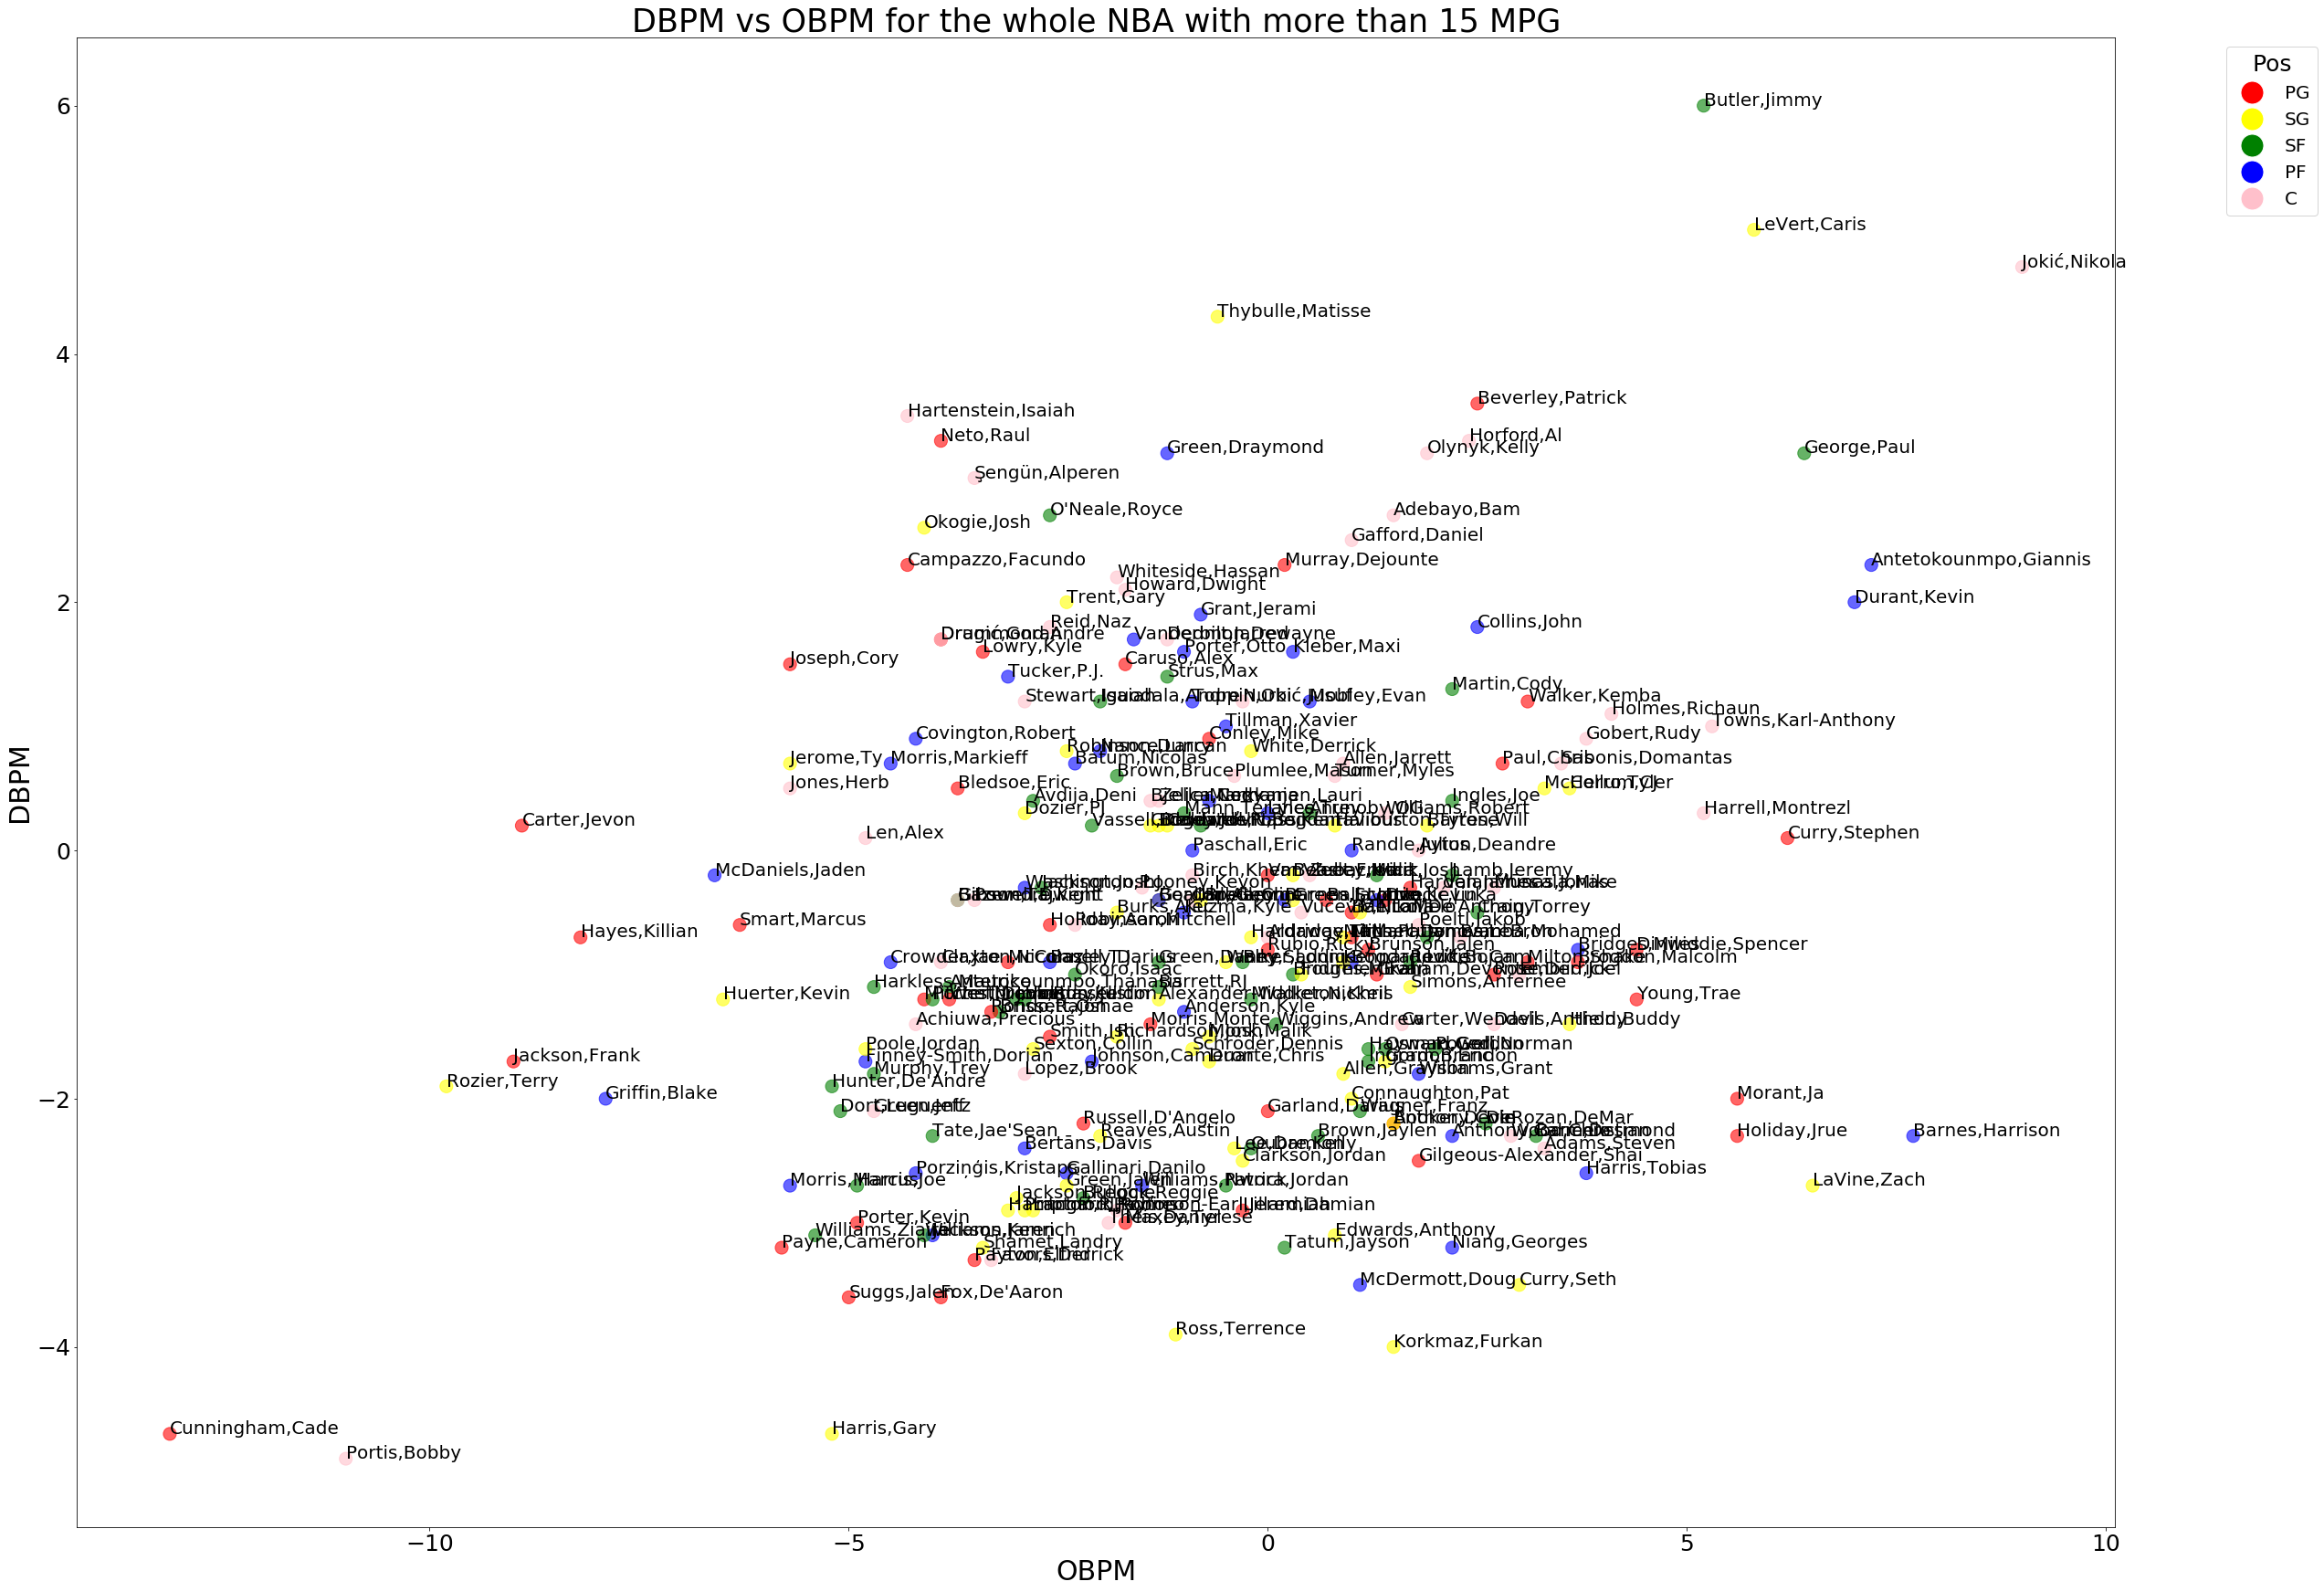

In [257]:
labeled_scatter('OBPM', 'DBPM', filter_col = "MPG", filter_val = 15, greater_than = True)

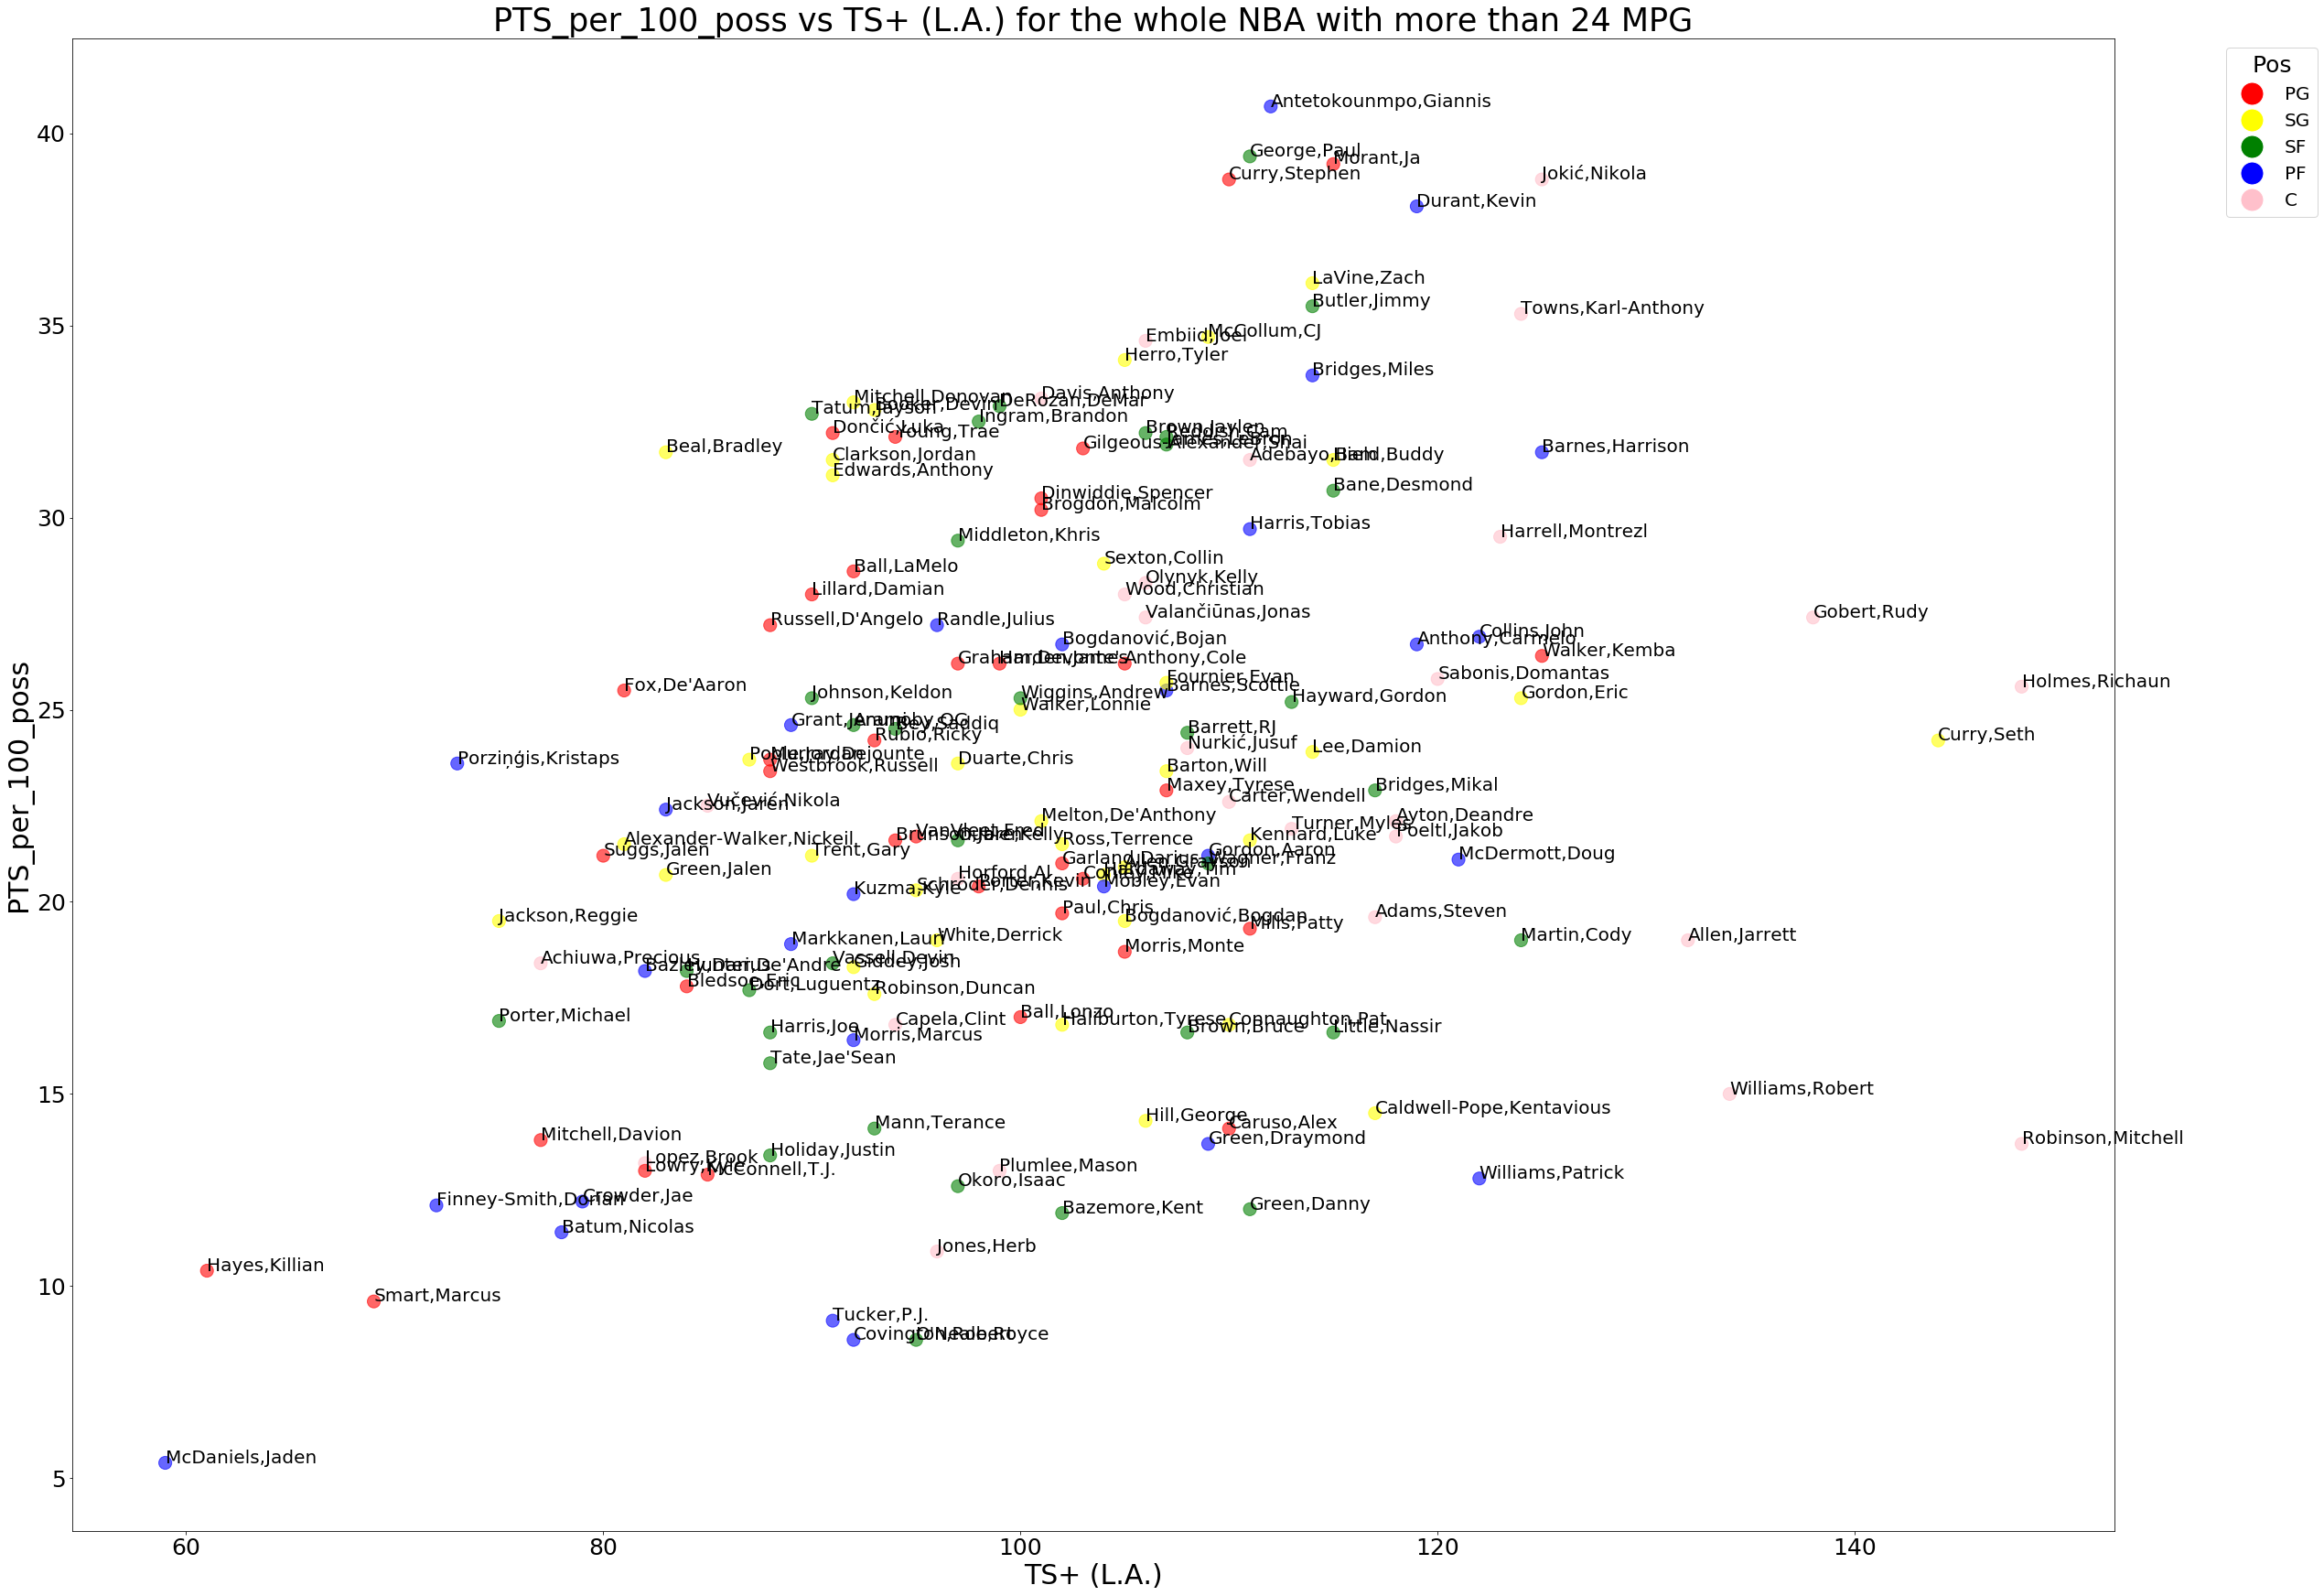

In [260]:
labeled_scatter('TS+ (L.A.)', 'PTS_per_100_poss', filter_col = "MPG", filter_val = 24, greater_than = True)

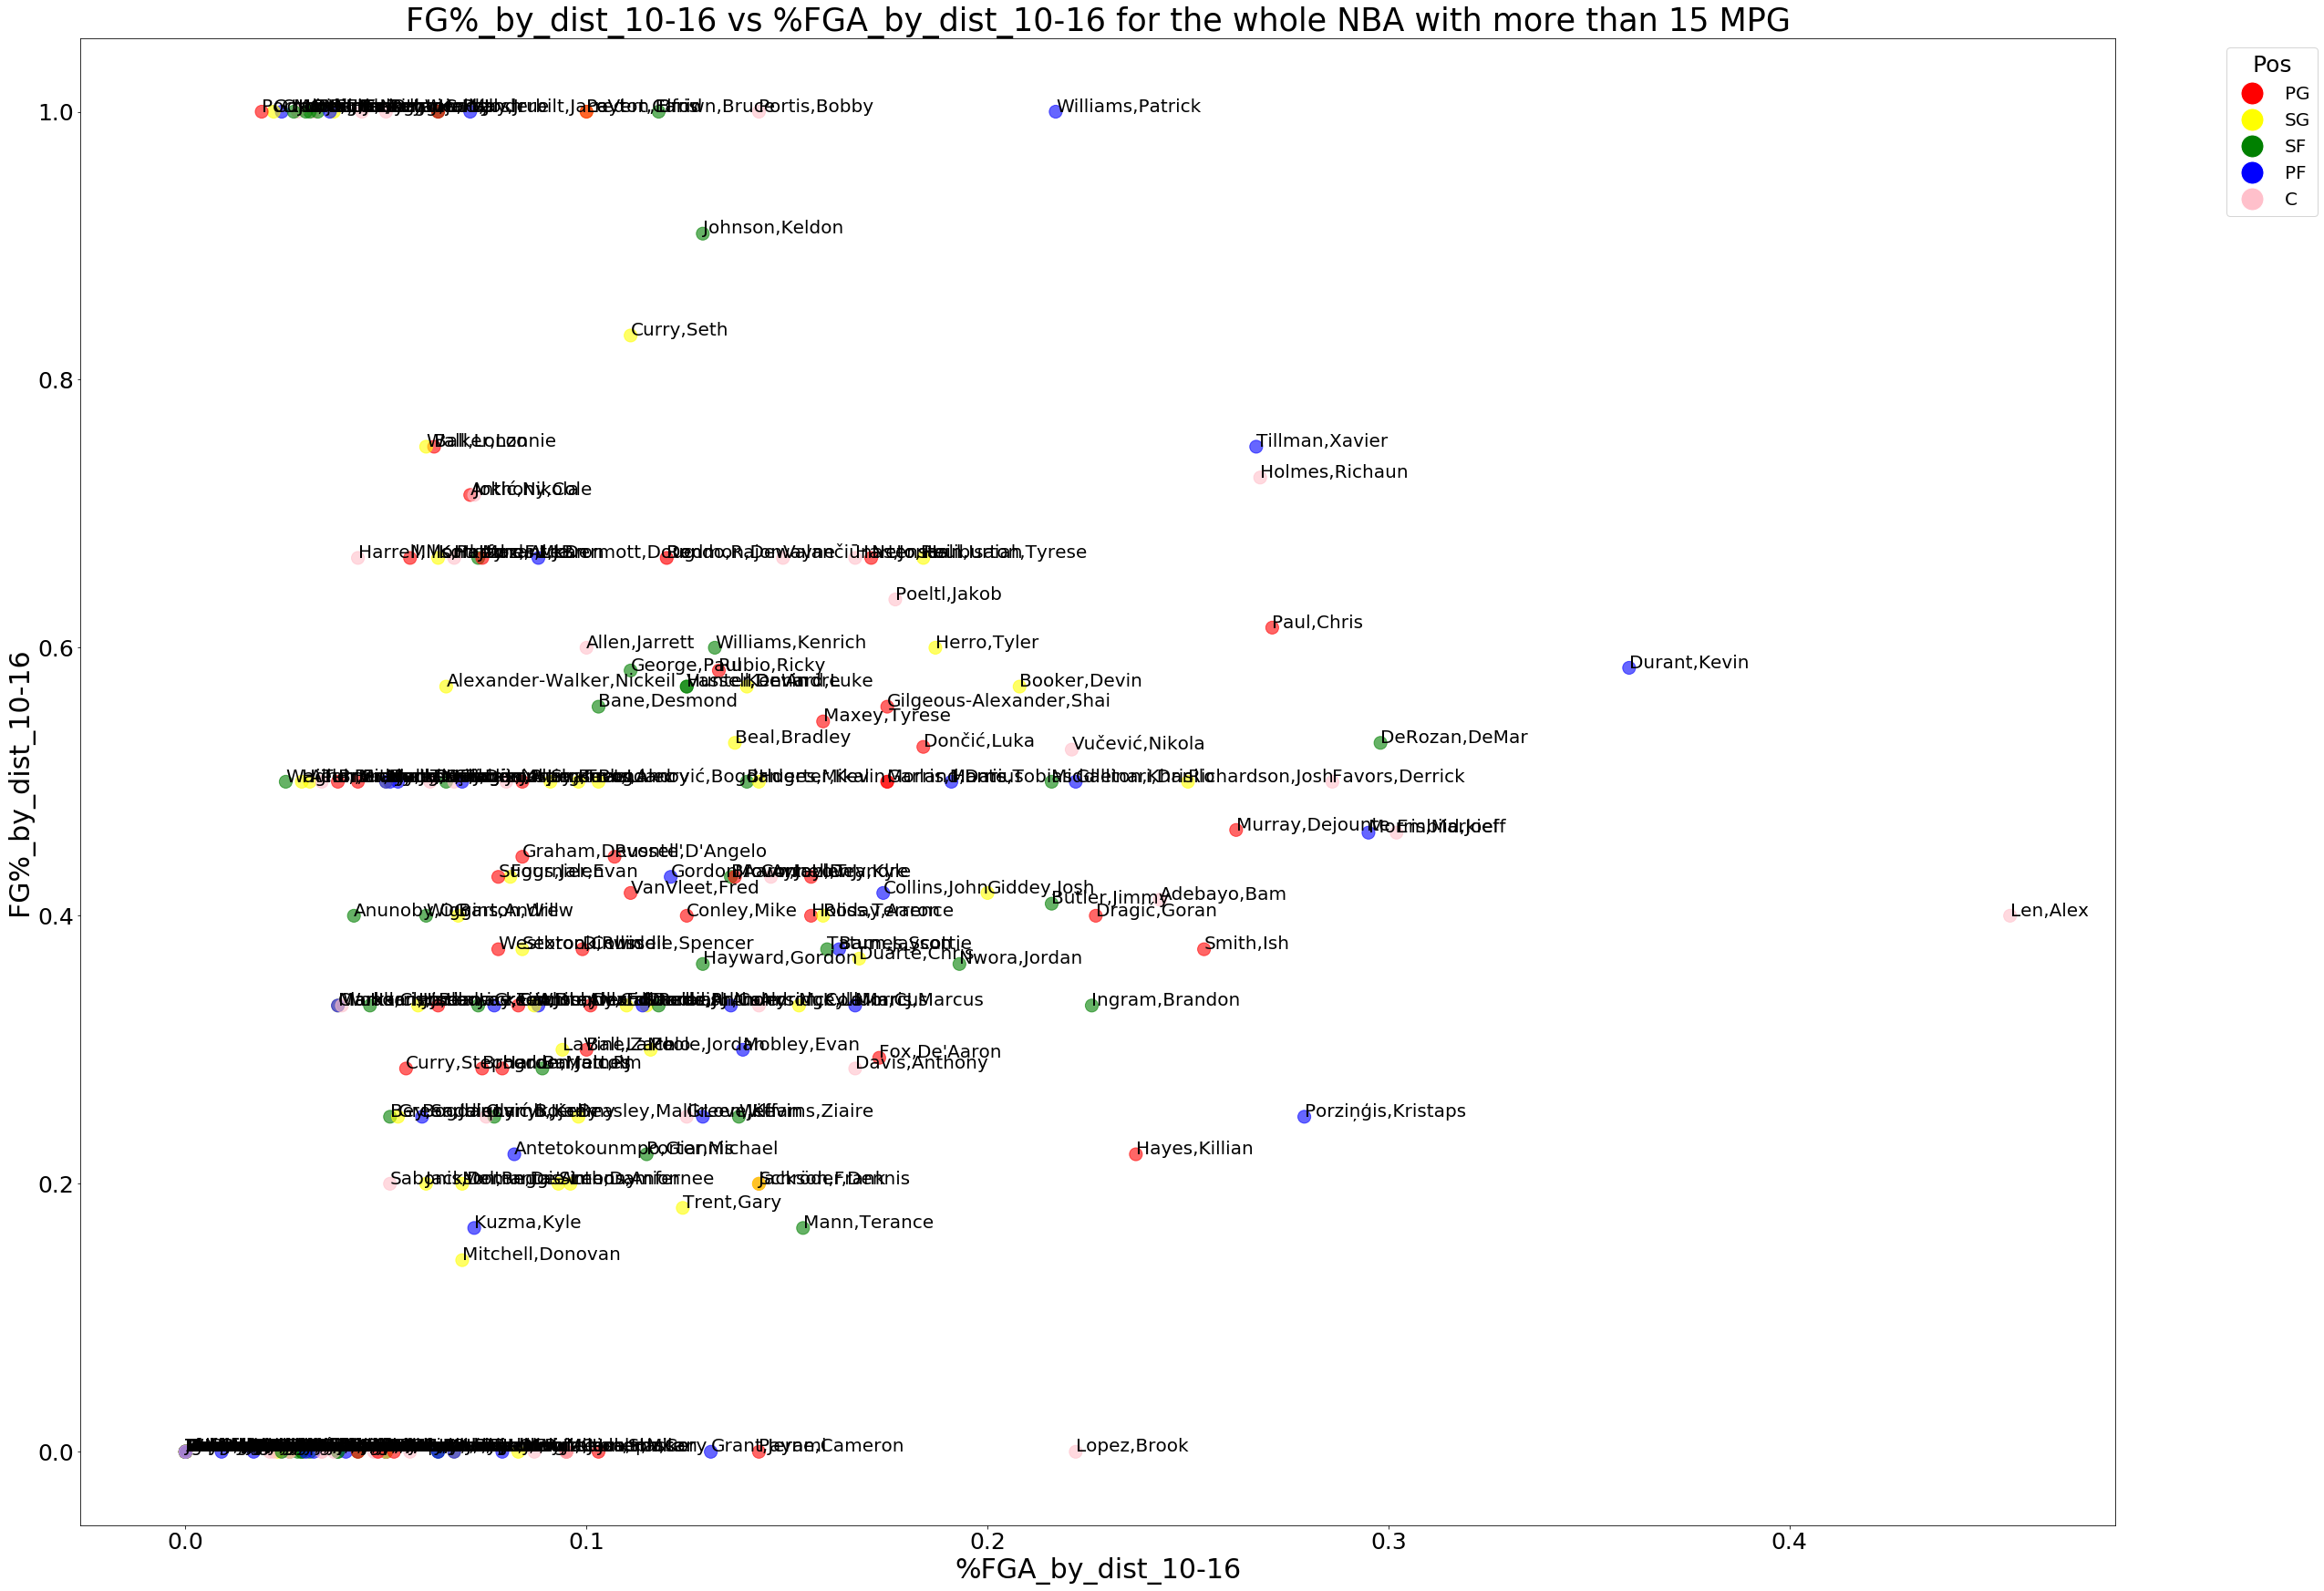

In [254]:
labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', filter_col = "MPG", filter_val = 15, greater_than = True)
#labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', data = SGs, filter_col = "MPG", filter_val = 15, greater_than = True)
#labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', data = SFs, filter_col = "MPG", filter_val = 15, greater_than = True)
#labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', data = PFs, filter_col = "MPG", filter_val = 15, greater_than = True)
#labeled_scatter('%FGA_by_dist_10-16', 'FG%_by_dist_10-16', data = Cs, filter_col = "MPG", filter_val = 15, greater_than = True)

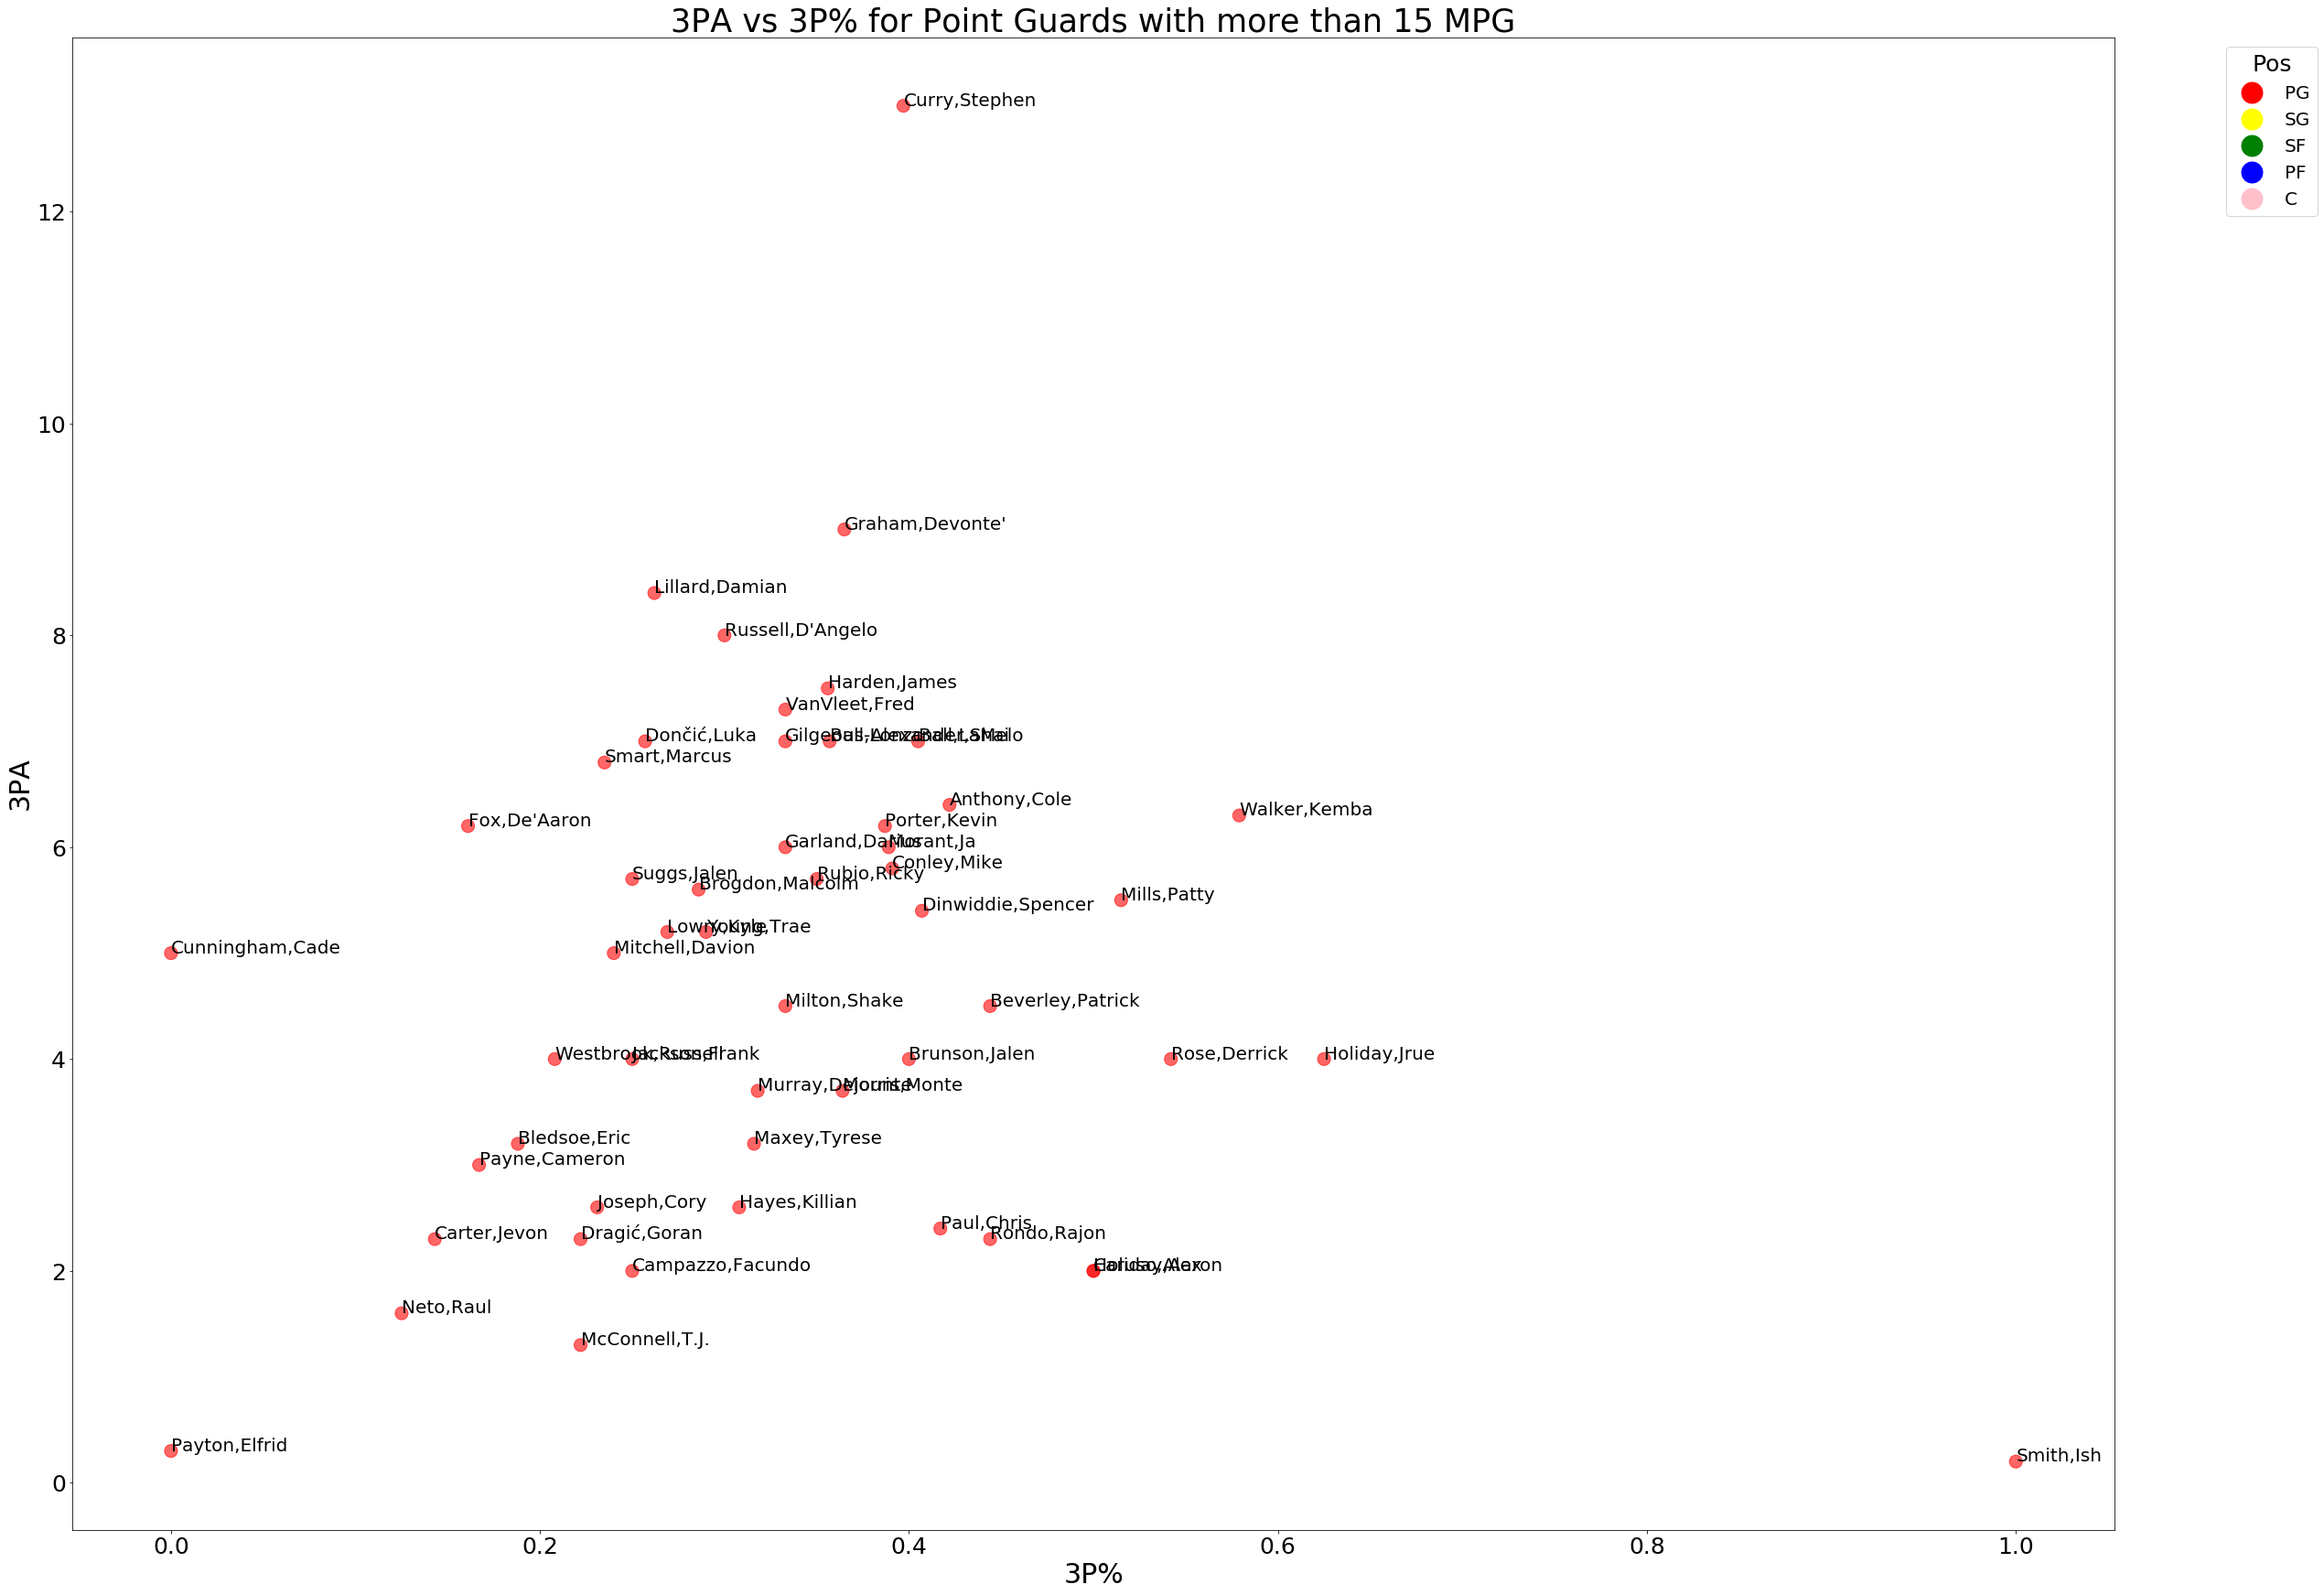

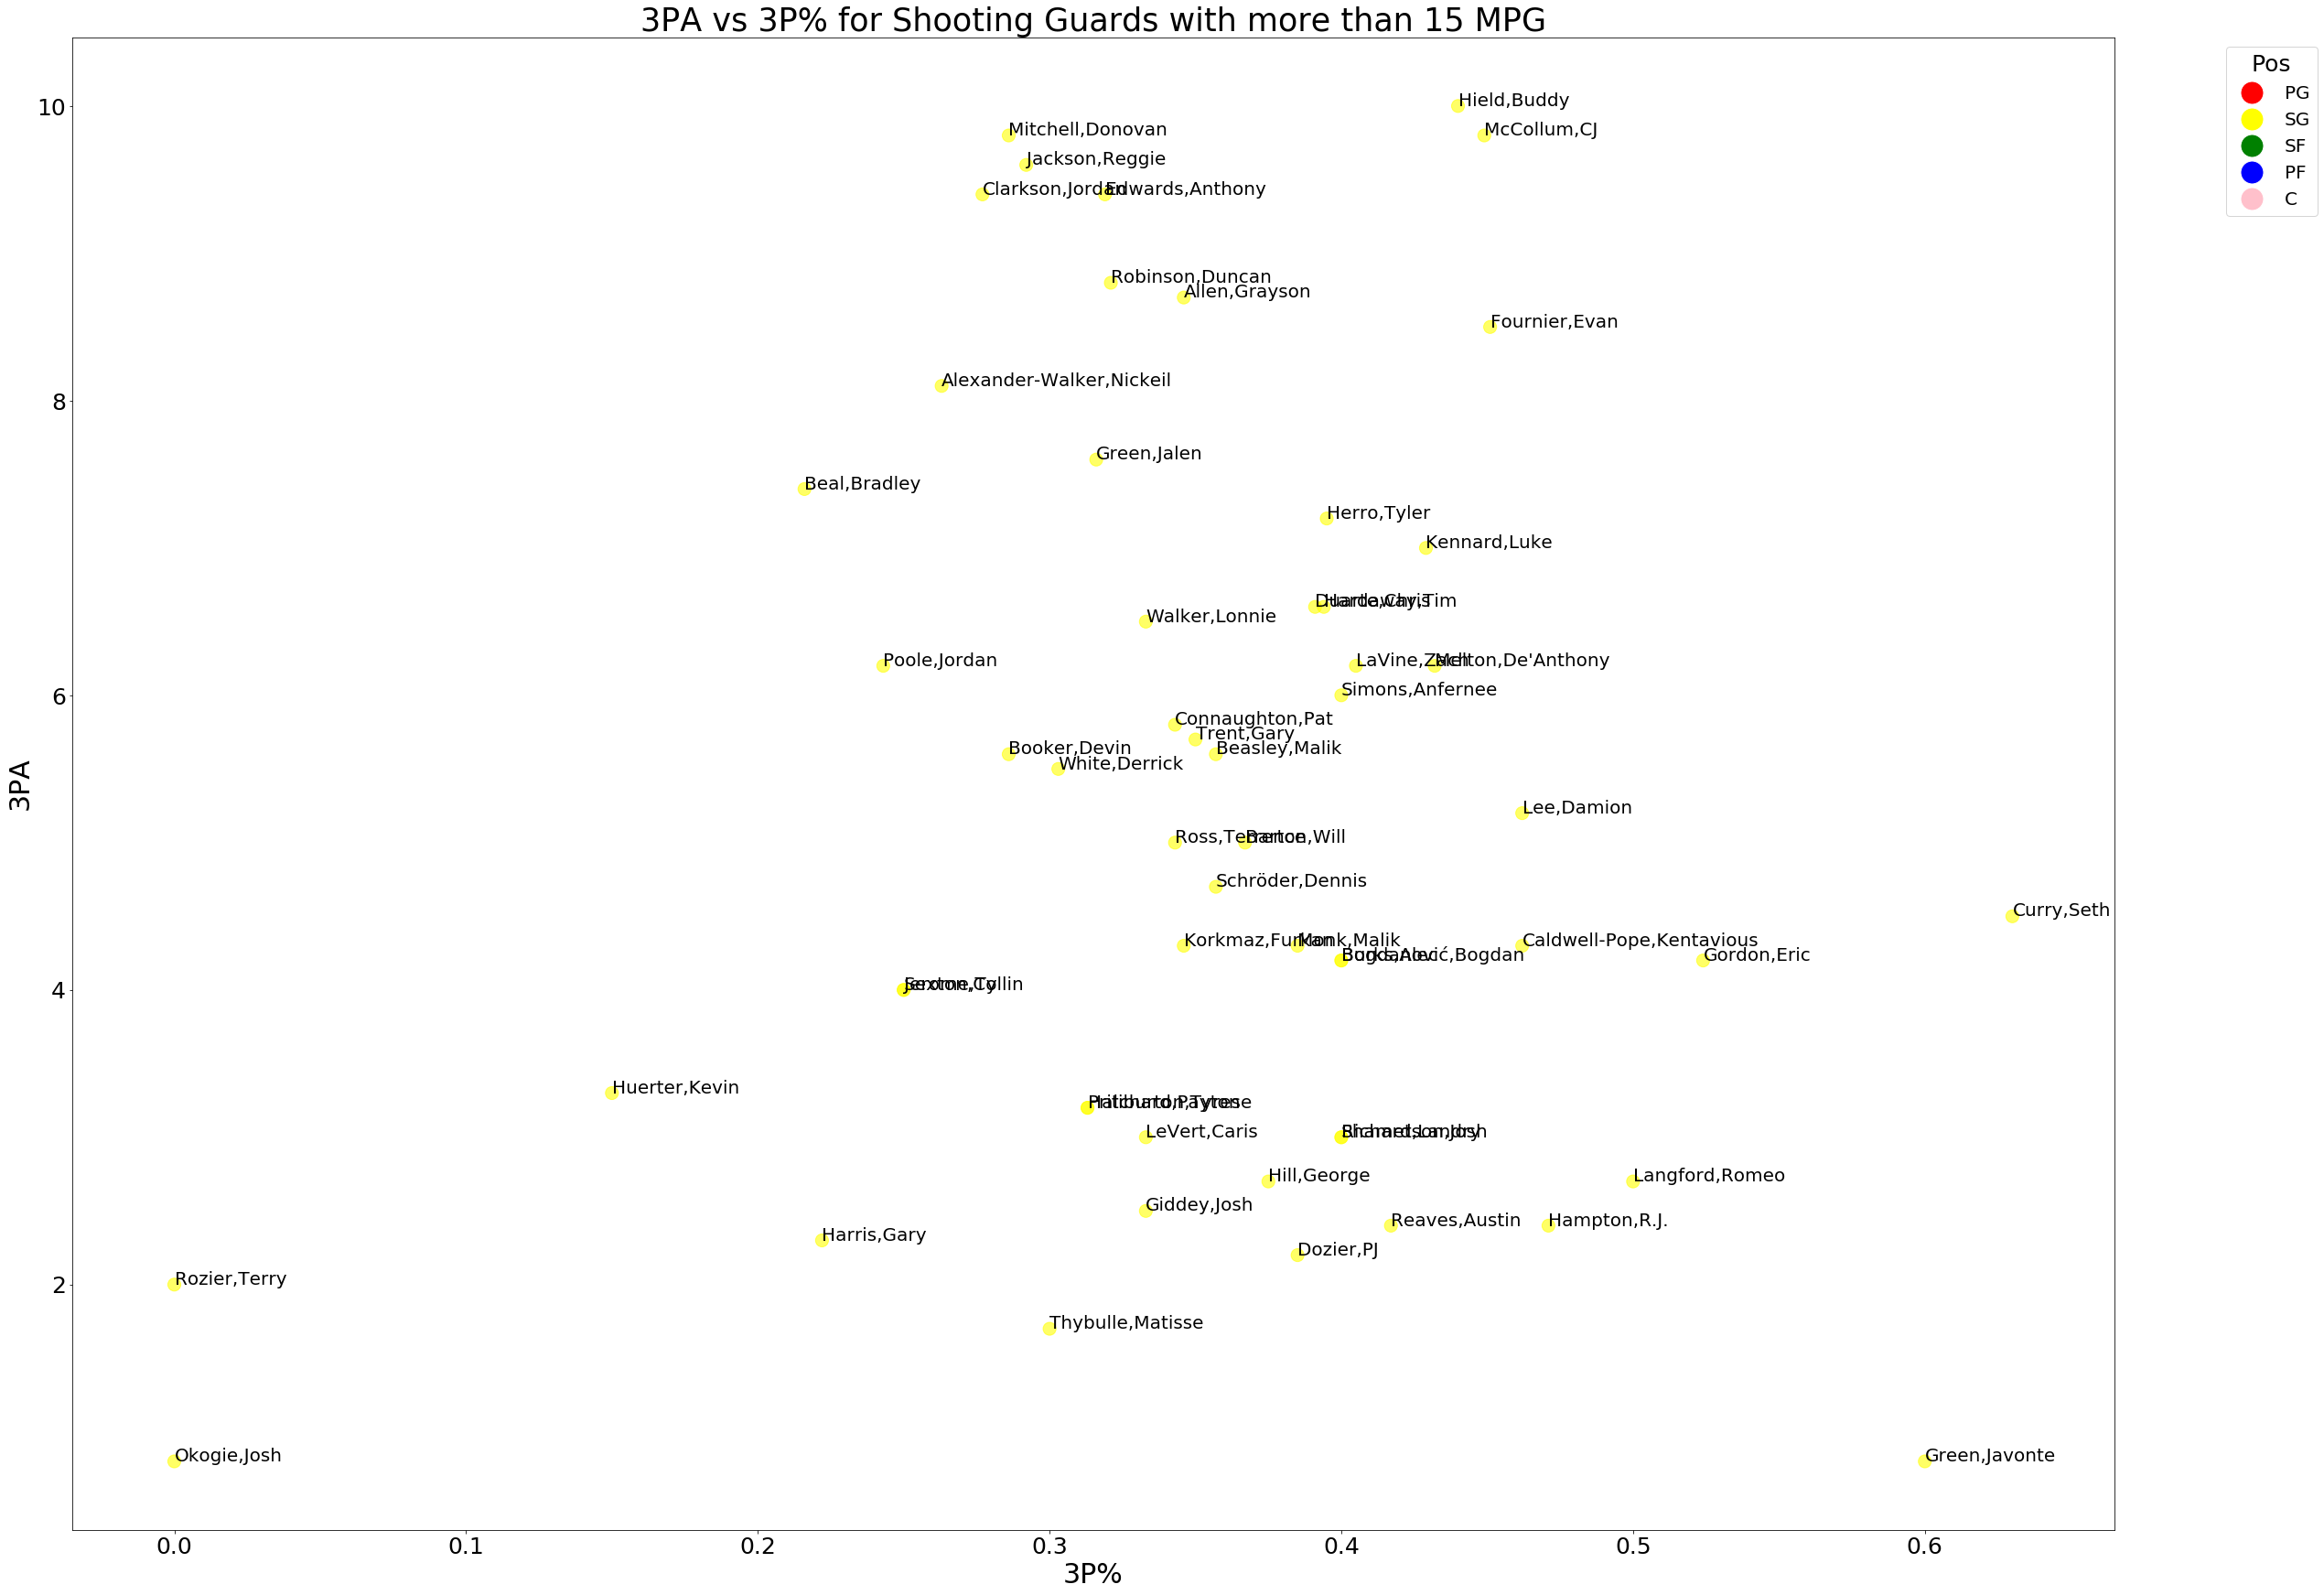

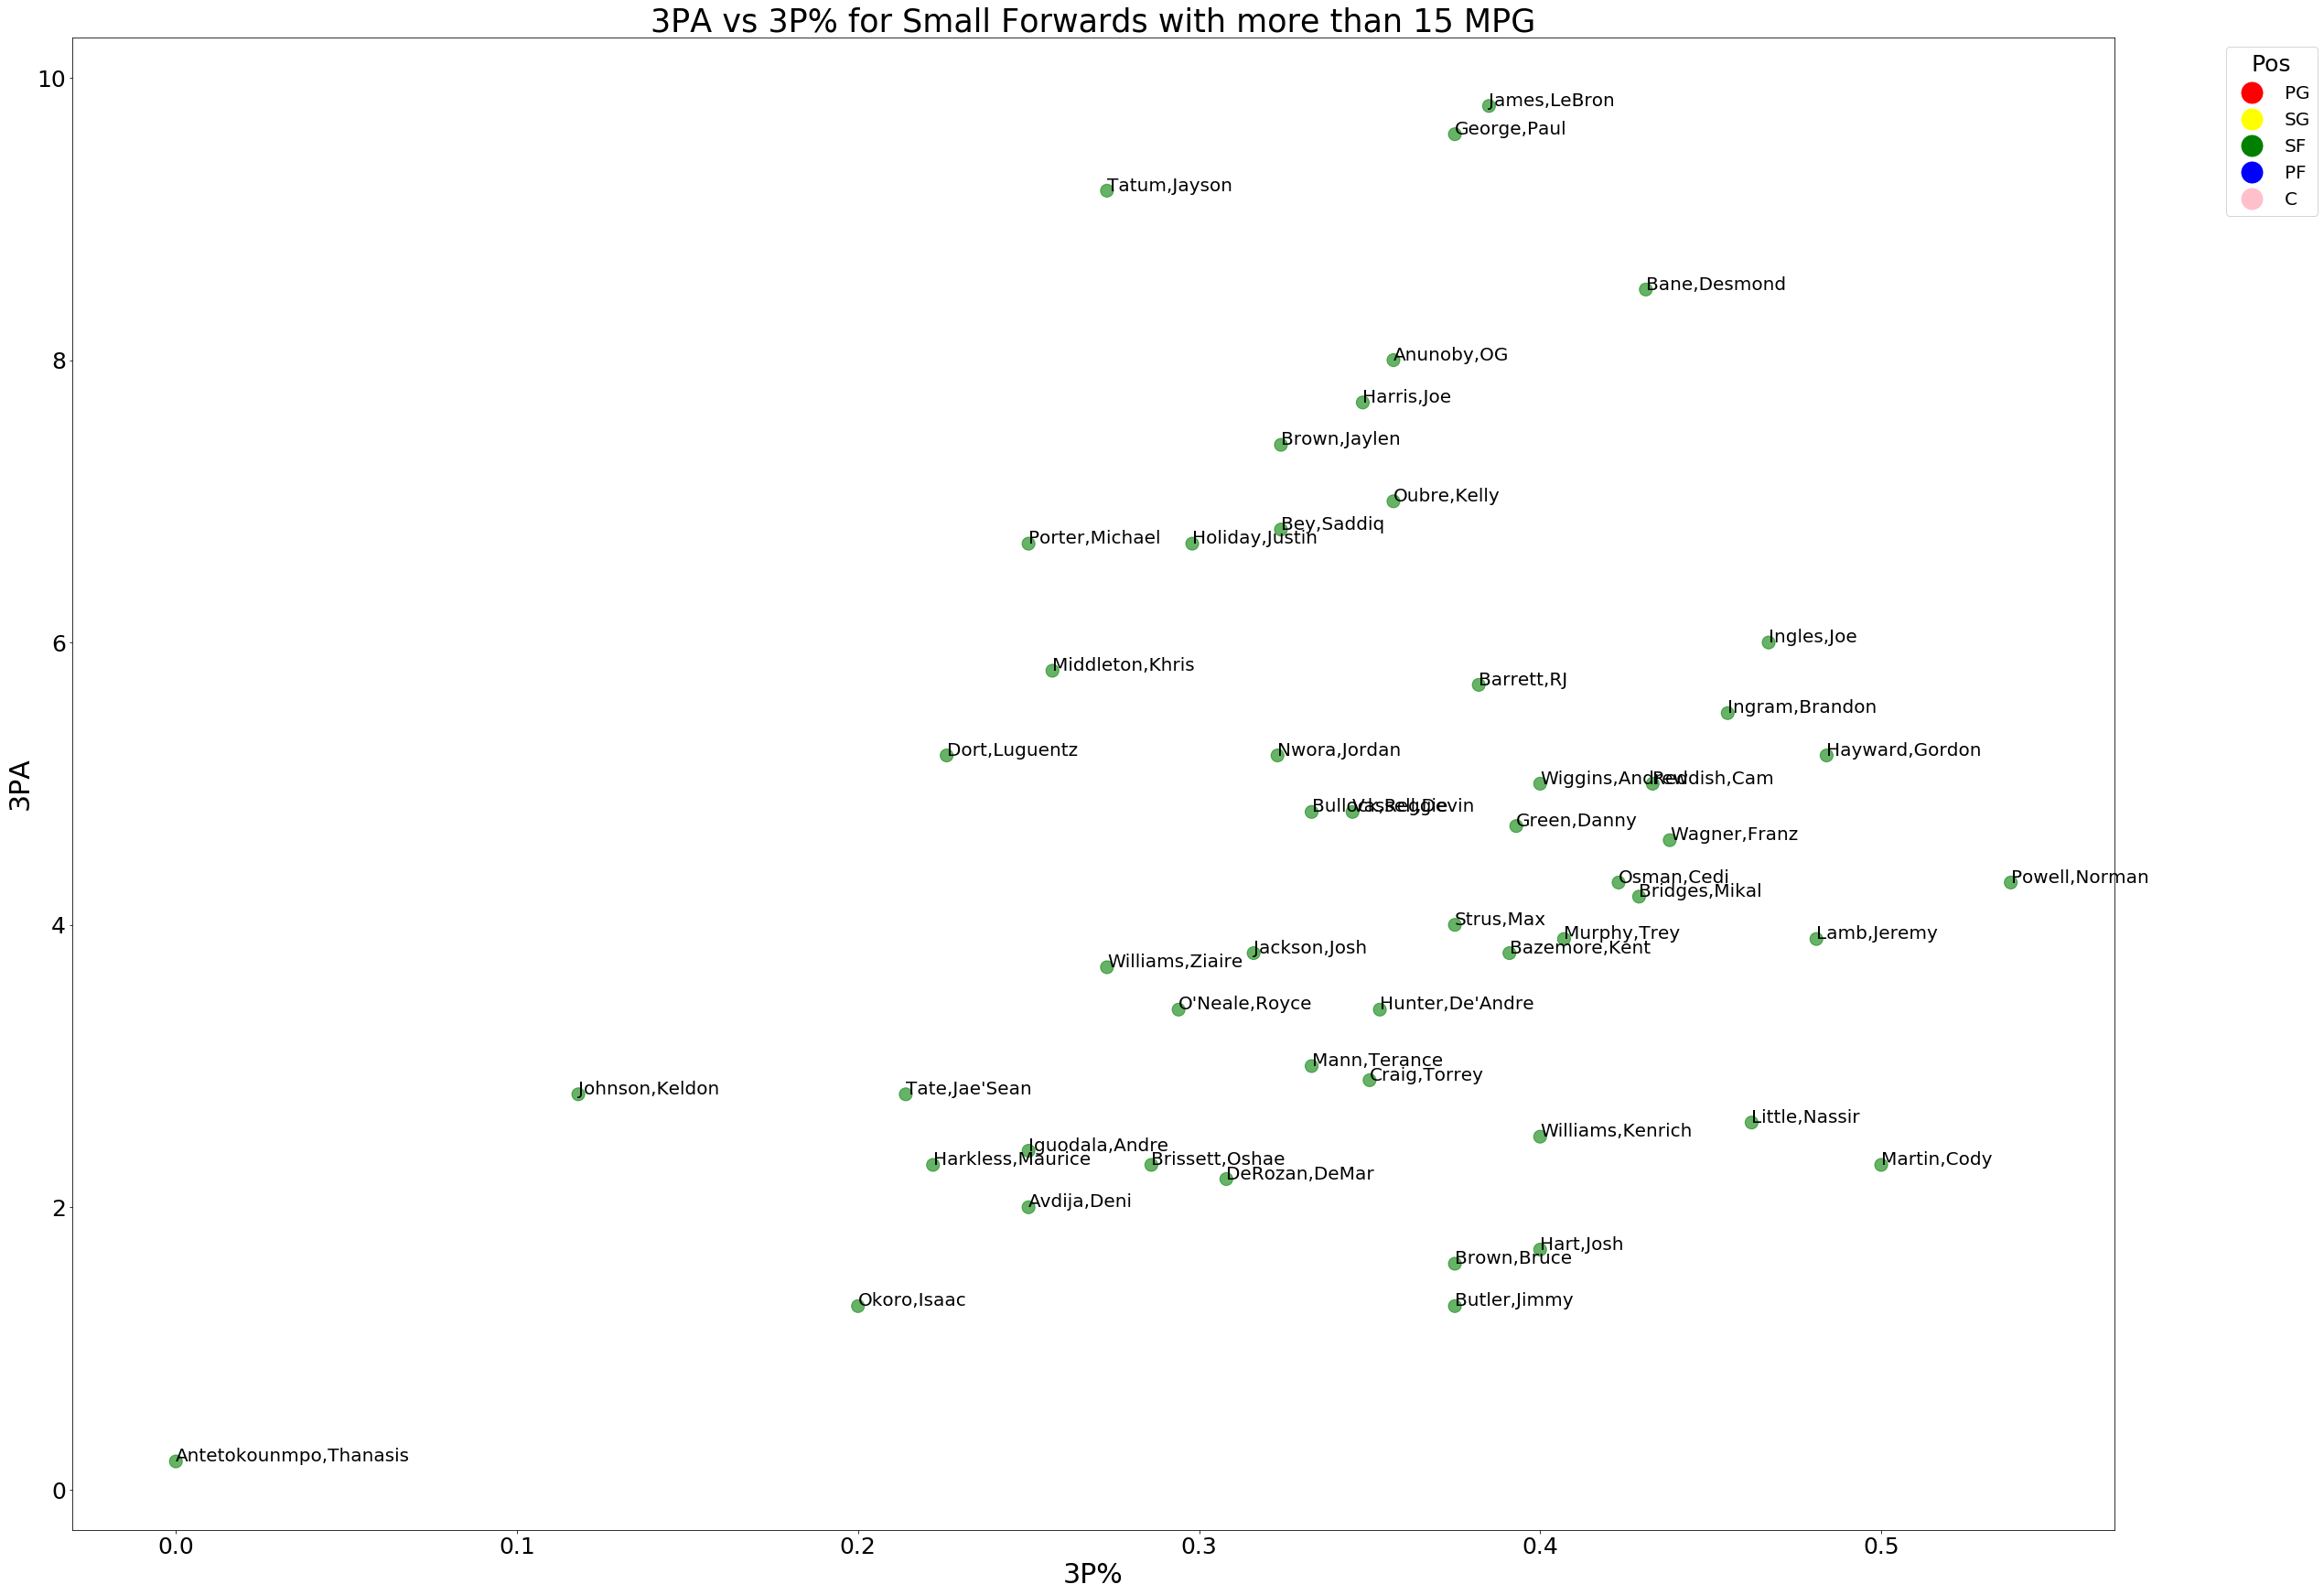

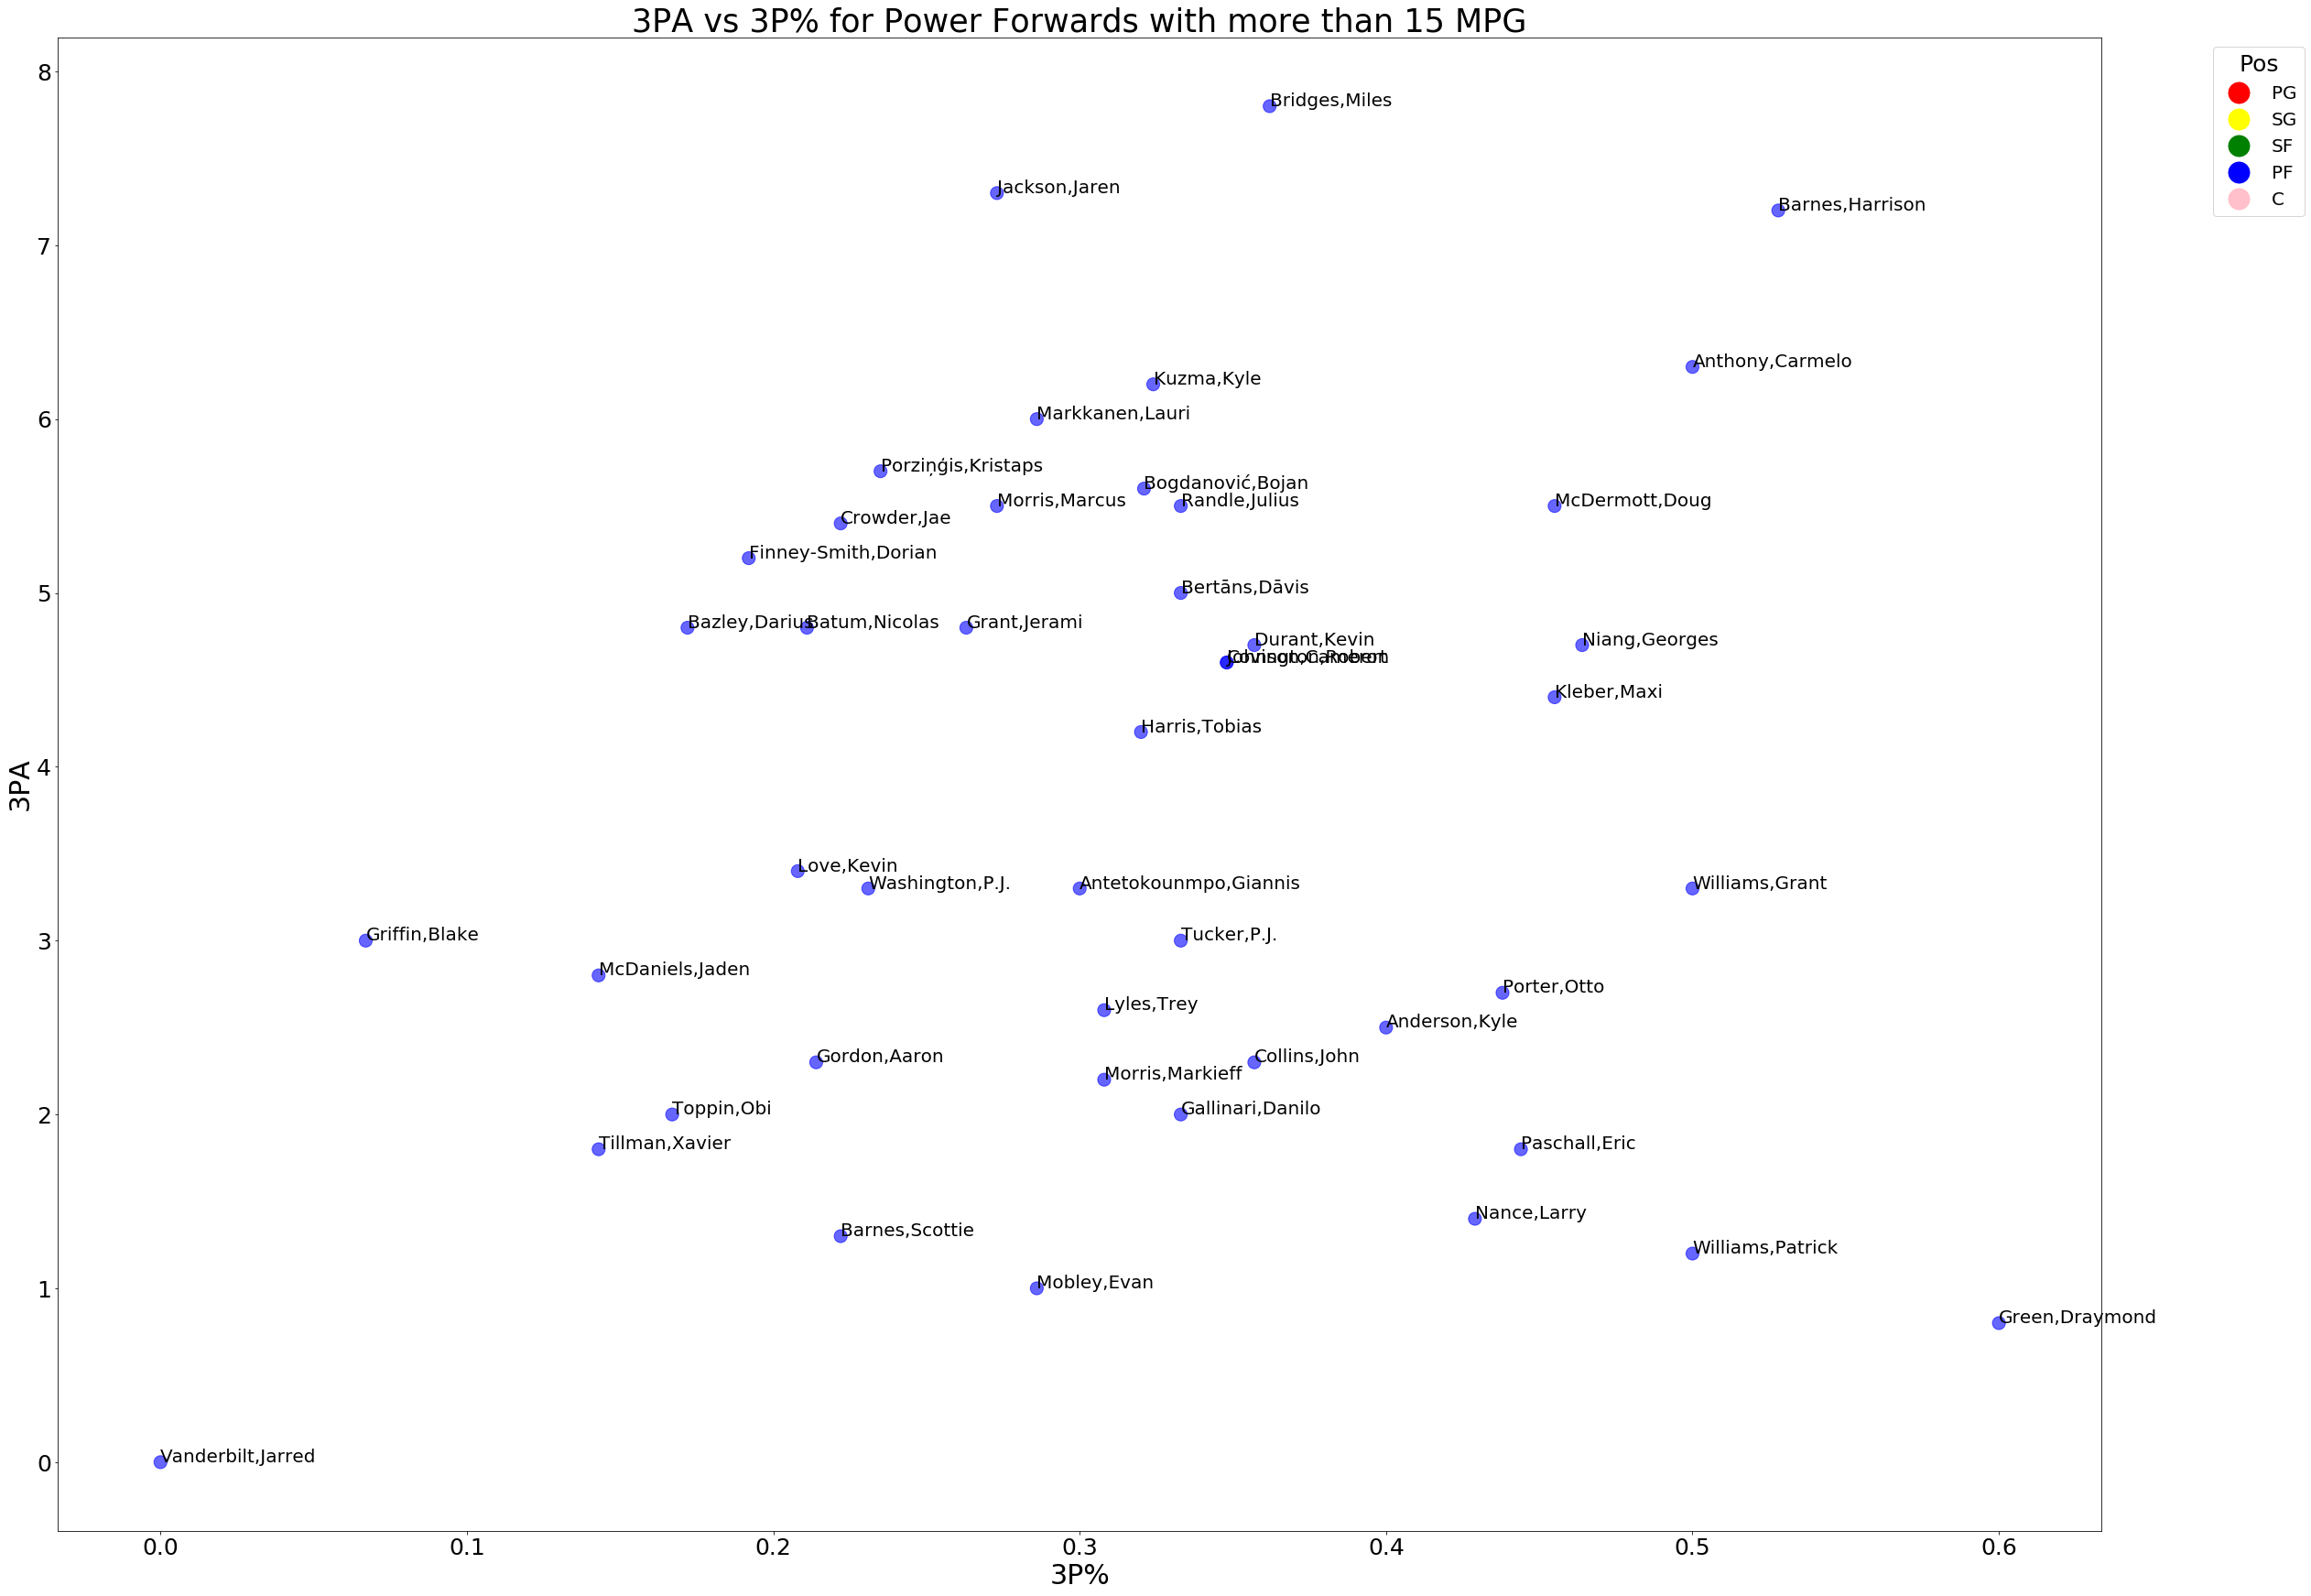

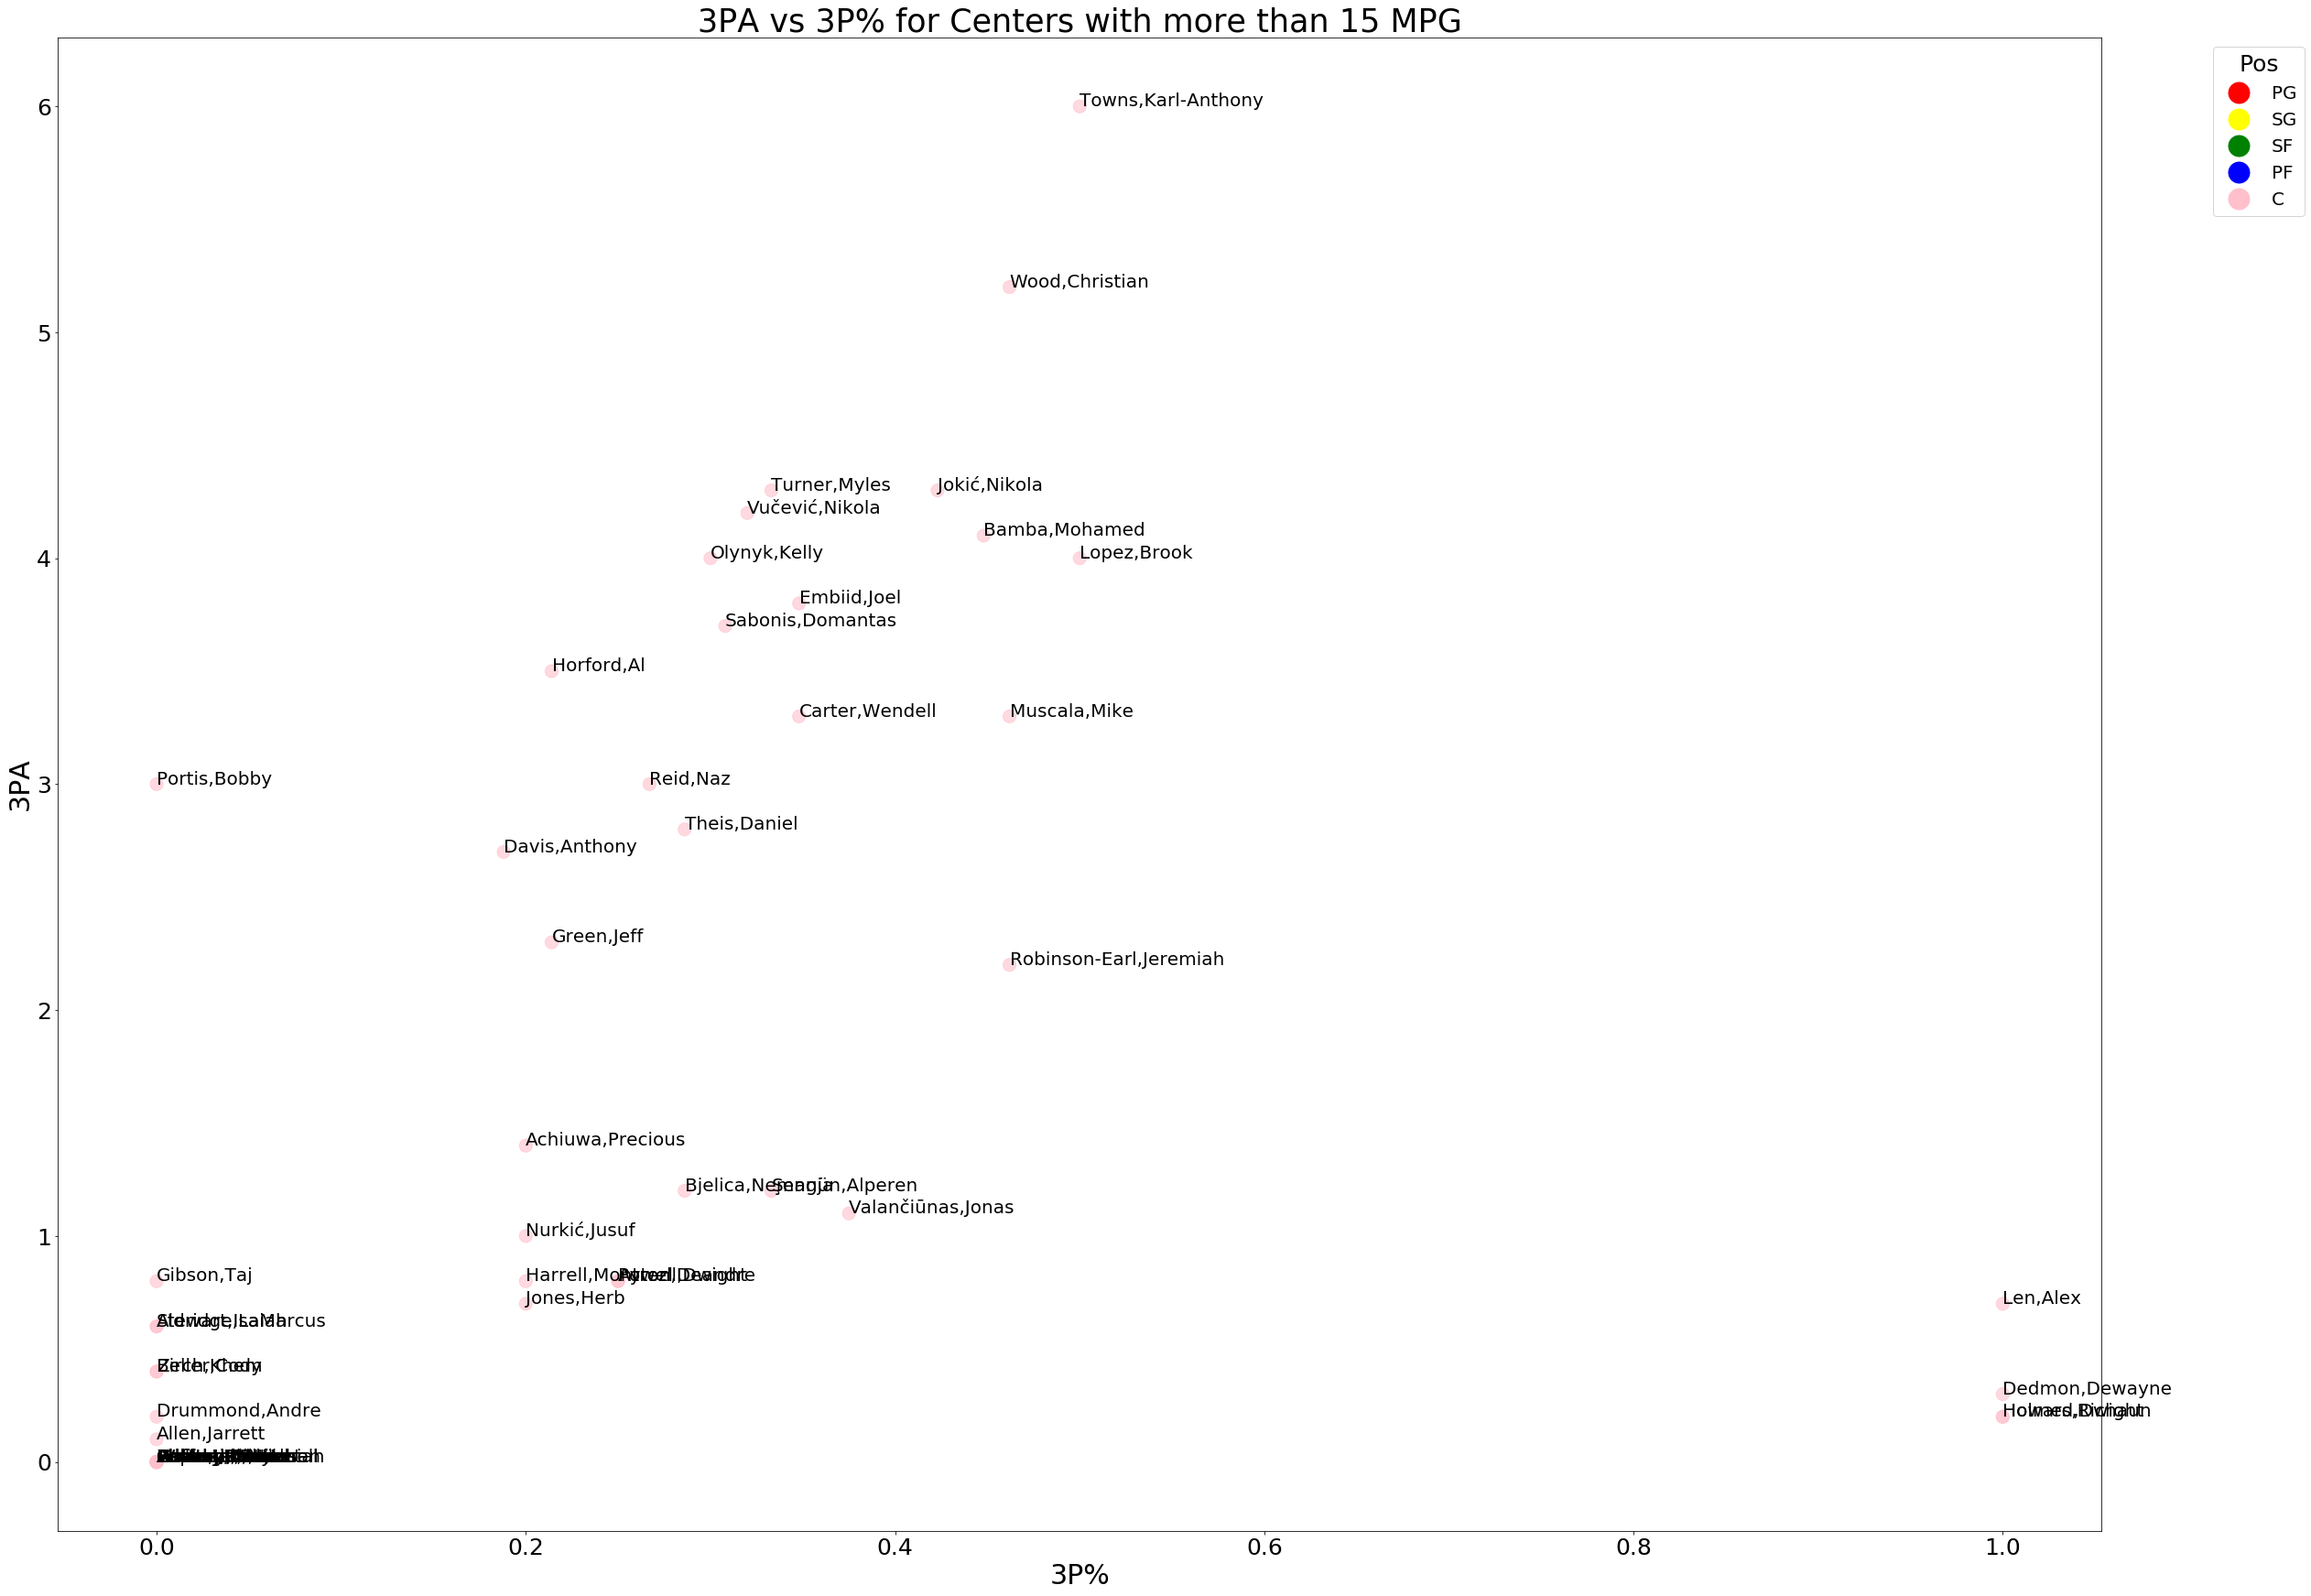

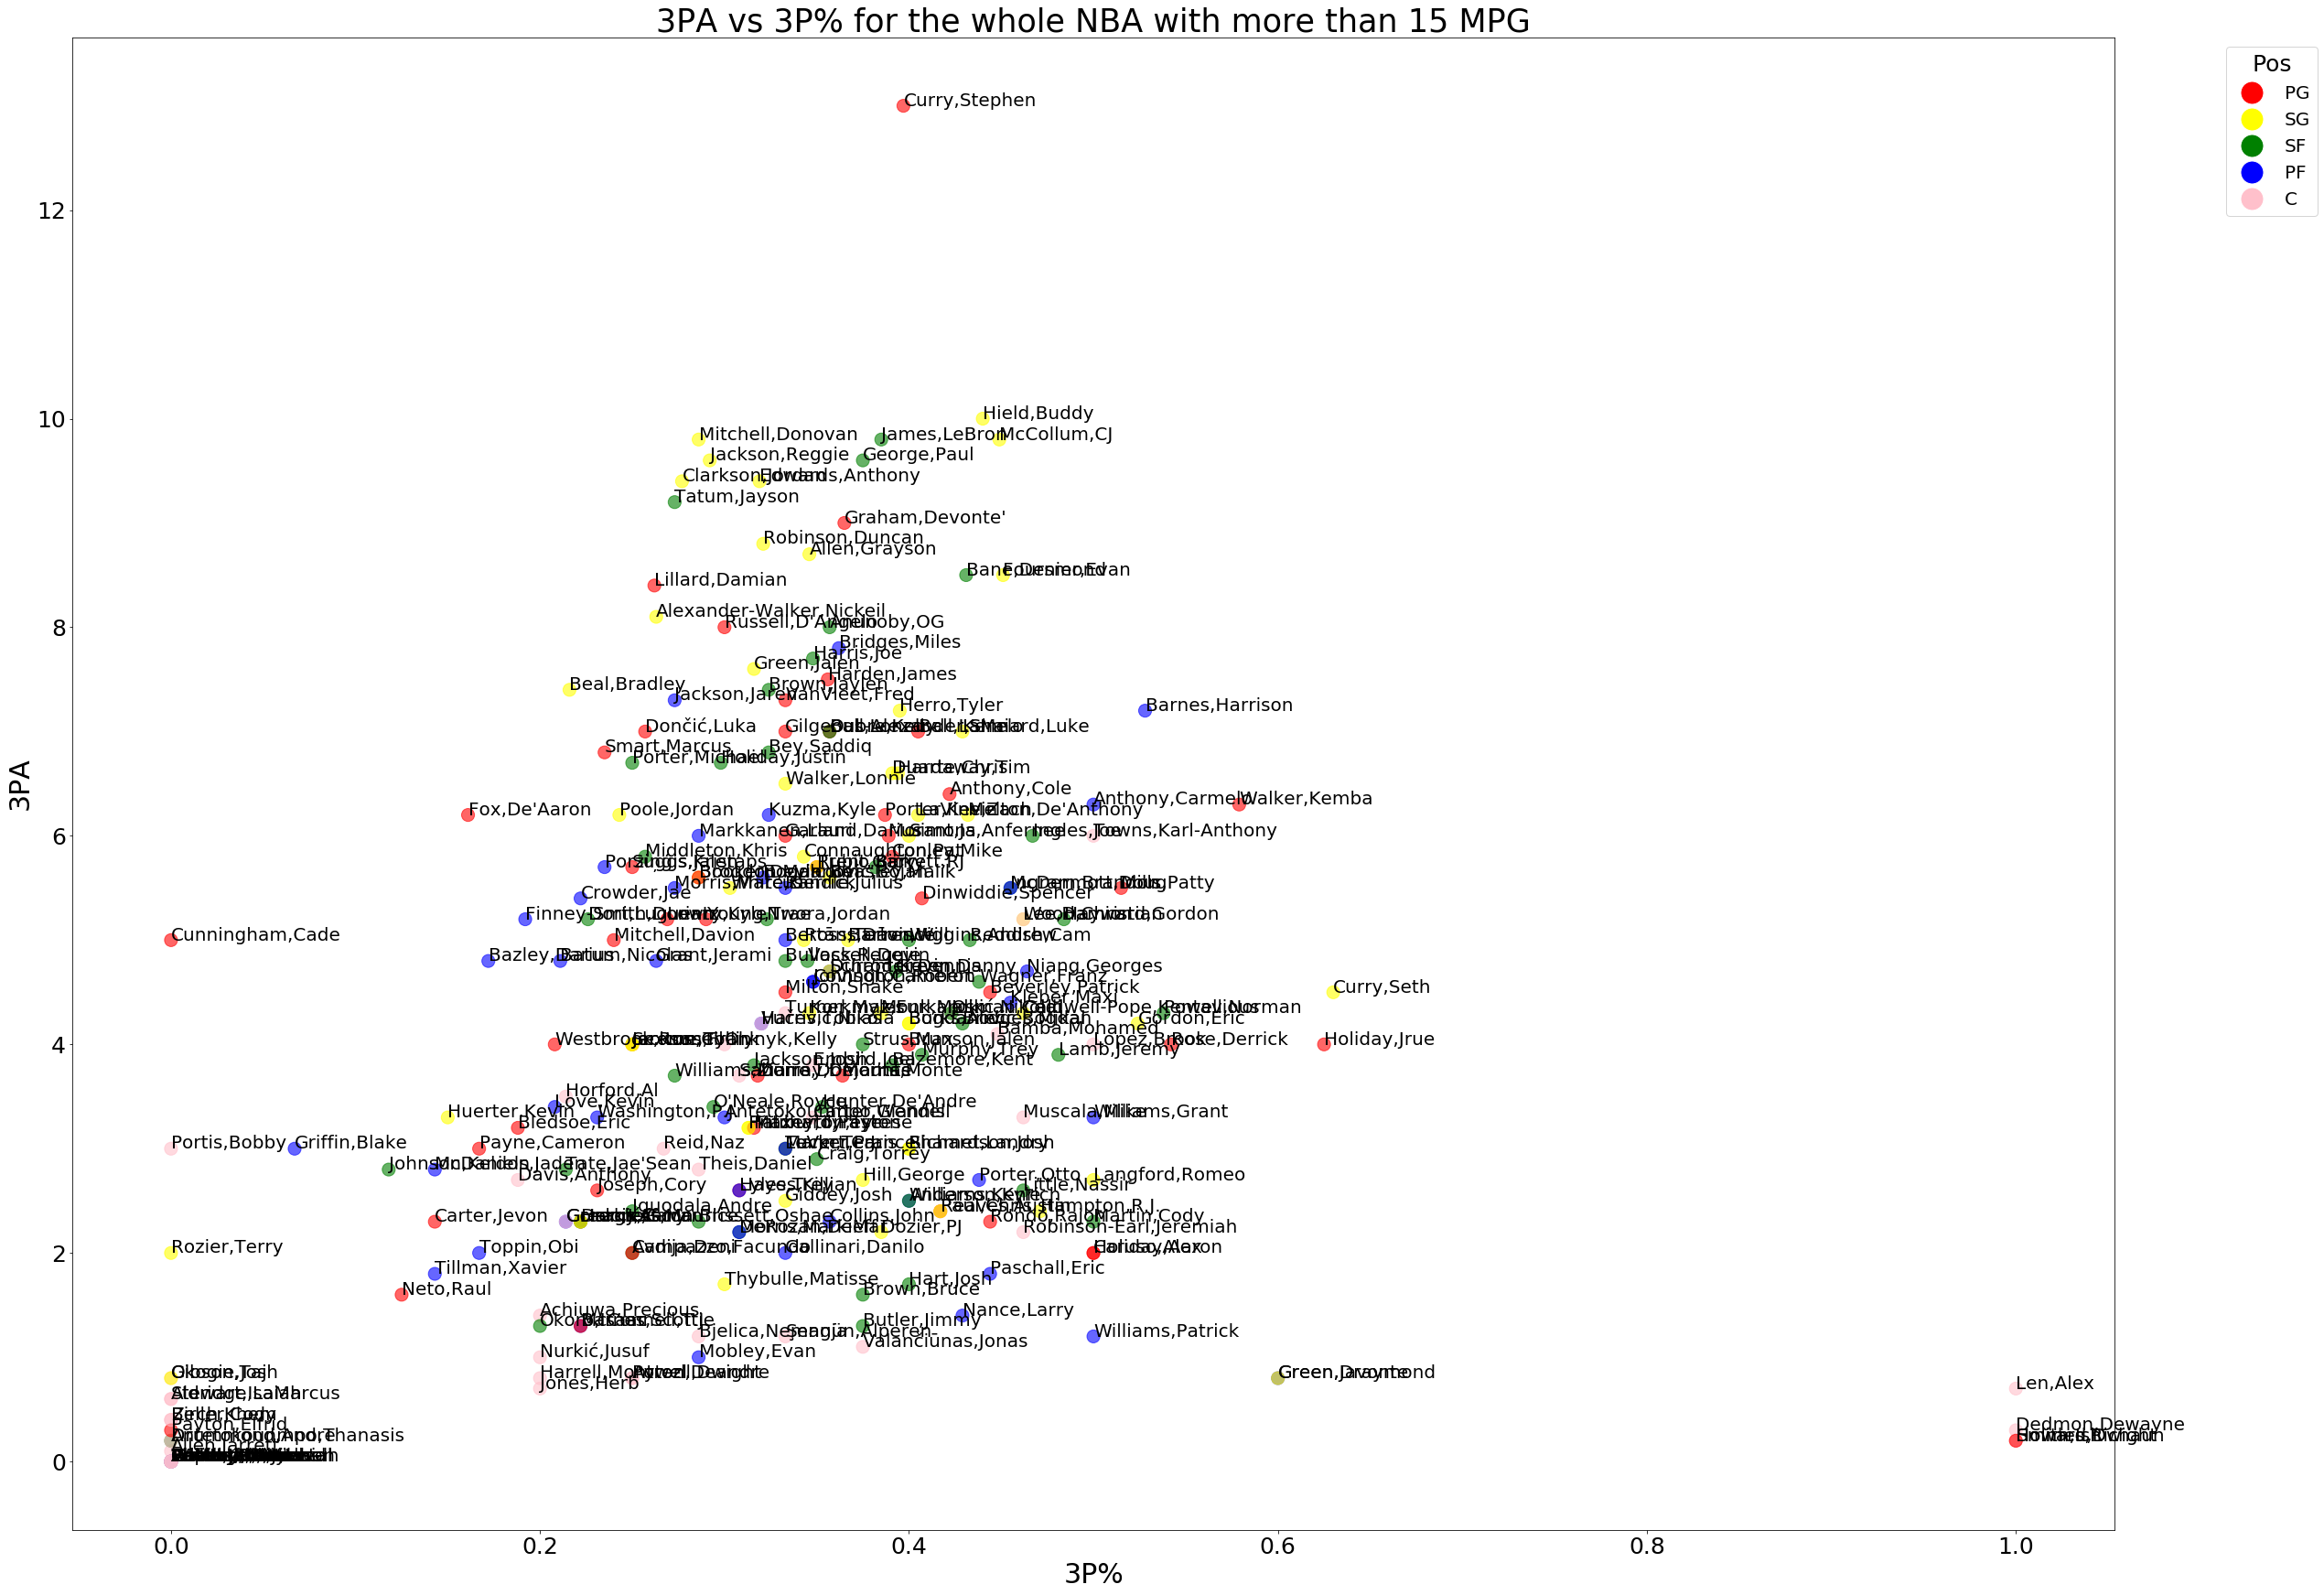

In [246]:
labeled_scatter('3P%', '3PA', data = PGs, filter_col = "MPG", filter_val = 15, greater_than = True)
labeled_scatter('3P%', '3PA', data = SGs, filter_col = "MPG", filter_val = 15, greater_than = True)
labeled_scatter('3P%', '3PA', data = SFs, filter_col = "MPG", filter_val = 15, greater_than = True)
labeled_scatter('3P%', '3PA', data = PFs, filter_col = "MPG", filter_val = 15, greater_than = True)
labeled_scatter('3P%', '3PA', data = Cs, filter_col = "MPG", filter_val = 15, greater_than = True)
labeled_scatter('3P%', '3PA', filter_col = "MPG", filter_val = 15, greater_than = True)